In [1]:
from utils import *

from pathlib import Path
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.losses import Huber
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, RepeatVector

PROJECT_ROOT = Path().resolve().parent
print(f"Project root: {PROJECT_ROOT}")

Project root: C:\Users\dxnin\Documents\dengue-forecast


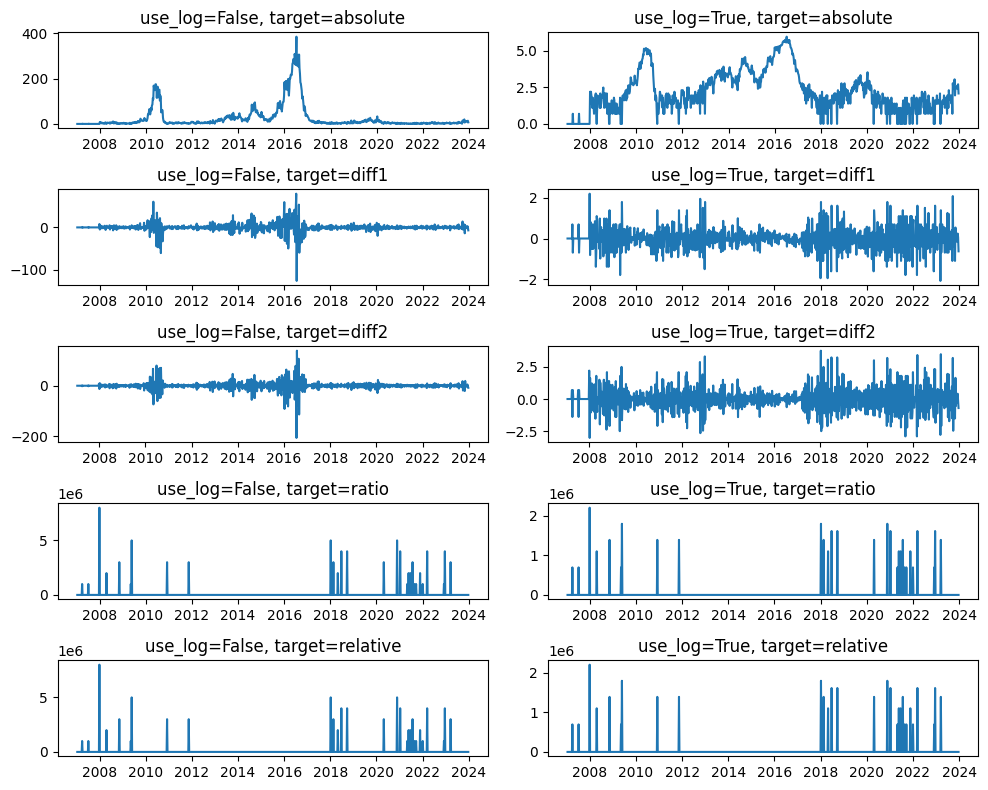

In [2]:
# Assessment visual para ver cuales series son candidatas a ser testeadas
use_logs = [False, True]
targets = ["absolute", "diff1", "diff2", "ratio", "relative"]

fig, axes = plt.subplots(len(targets), len(use_logs), figsize=(10, 8))

for r, tm in enumerate(targets):
    for c, ul in enumerate(use_logs):
        df = pd.read_pickle(f"{PROJECT_ROOT}/data/conformed/data.pkl")
        df = format_df(df, **{"exog": True, "add_outlier": True, "use_log": ul, "target_mode": tm})
        axes[r, c].plot(df.CASES)
        axes[r, c].set_title(f"use_log={ul}, target={tm}")

plt.tight_layout()
plt.show()

In [3]:
# Las series ratio y relative no son candidatas

## Config

In [4]:
use_logs = [
    False,
    True
]
targets = [
    "absolute",
    "diff1",
    "diff2"
]
dates_tuples = [
    ["2007-01-01", "2020-06-28", "2024-01-01"],
    ["2017-01-01", "2020-06-28", "2024-01-01"],
    ["2011-01-01", "2012-06-01", "2014-01-01"]
]

In [5]:
architectures = [

    {
        "name": "LSTM-128-Huber",
        "model": lambda input_shape: Sequential([
            LSTM(128, input_shape=input_shape),
            Dropout(0.3),
            Dense(1)
        ]),
        "loss": Huber(delta=1.0),
        "epochs": 100,
        "batch_size": 32,
        "timesteps": 52
    },

    {
        "name": "StackedLSTM-256-128",
        "model": lambda input_shape: Sequential([
            LSTM(256, return_sequences=True, input_shape=input_shape),
            Dropout(0.3),
            LSTM(128),
            Dense(1)
        ]),
        "loss": "mae",
        "epochs": 120,
        "batch_size": 16,
        "timesteps": 52
    },

    {
        "name": "BiLSTM-128",
        "model": lambda input_shape: Sequential([
            Bidirectional(LSTM(128, return_sequences=False, input_shape=input_shape)),
            Dropout(0.2),
            Dense(1)
        ]),
        "loss": Huber(delta=0.5),
        "epochs": 80,
        "batch_size": 64,
        "timesteps": 52
    },

    {
        "name": "EncDec-64",
        "model": lambda input_shape: Sequential([
            LSTM(64, input_shape=input_shape),
            RepeatVector(1),
            LSTM(64, return_sequences=False),
            Dense(1),
        ]),
        "loss": "mse",
        "epochs": 150,
        "batch_size": 32,
        "timesteps": 52
    },

    {
        "name": "LSTM-200-DenseWide",
        "model": lambda input_shape: Sequential([
            LSTM(200, input_shape=input_shape),
            Dense(64, activation="relu"),
            Dropout(0.3),
            Dense(1)
        ]),
        "loss": Huber(delta=1.5),
        "epochs": 100,
        "batch_size": 32,
        "timesteps": 52
    },

    {
        "name": "DeepStackedLSTM-256-128-64",
        "model": lambda input_shape: Sequential([
            LSTM(256, return_sequences=True, input_shape=input_shape),
            Dropout(0.2),
            LSTM(128, return_sequences=True),
            Dropout(0.2),
            LSTM(64),
            Dense(1)
        ]),
        "loss": Huber(delta=1.0),
        "epochs": 150,
        "batch_size": 16,
        "timesteps": 52
    },
]


## Test


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.6665
   MAE: 2.7335
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


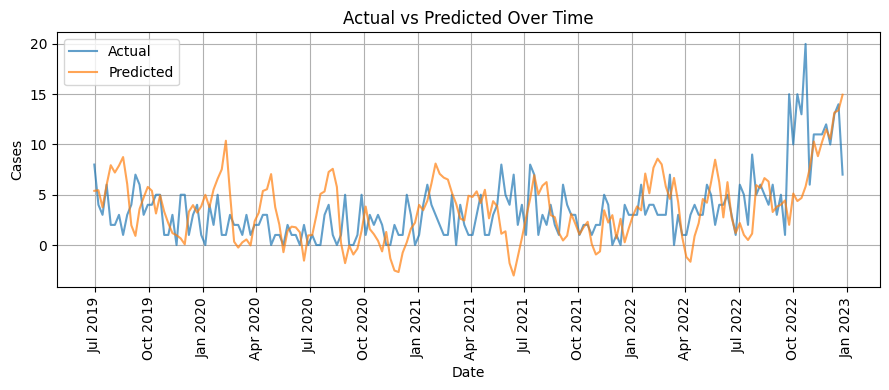


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 198ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6004
   MAE: 1.9502
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


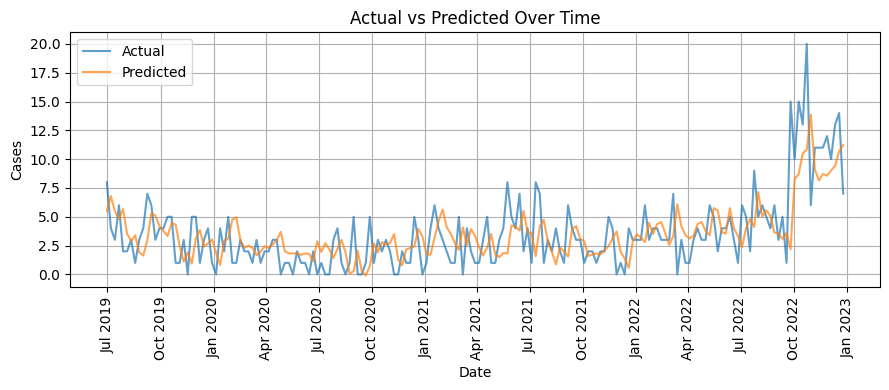


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.9156
   MAE: 2.9668
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


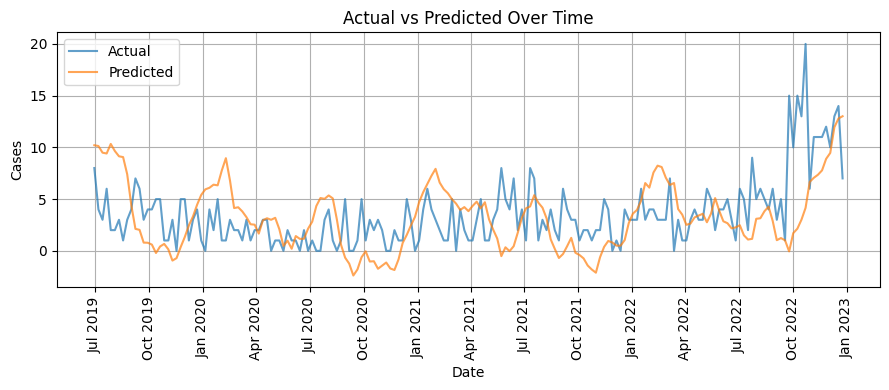


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.5954
   MAE: 2.7398
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


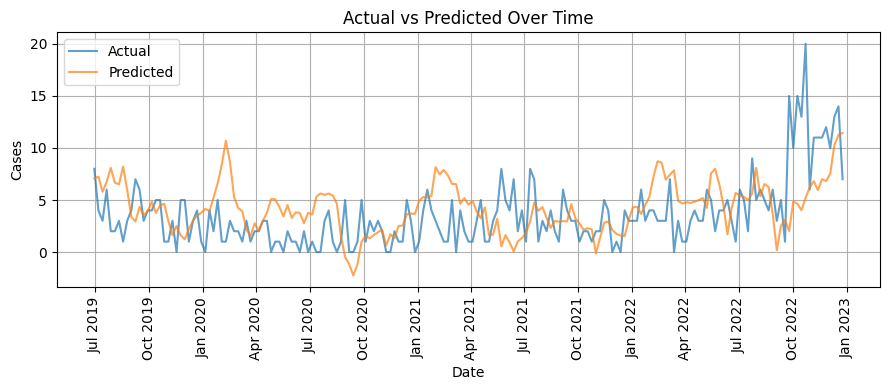


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
   📊 --- Model Evaluation ---
   RMSE: 5.6840
   MAE: 5.0331
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


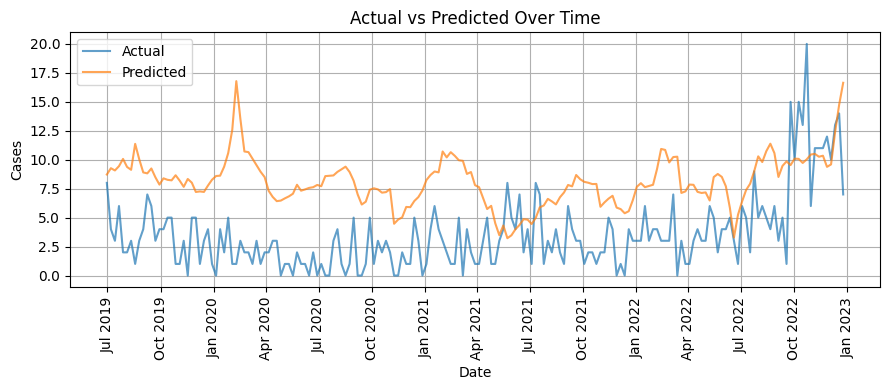


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.8063
   MAE: 2.9069
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


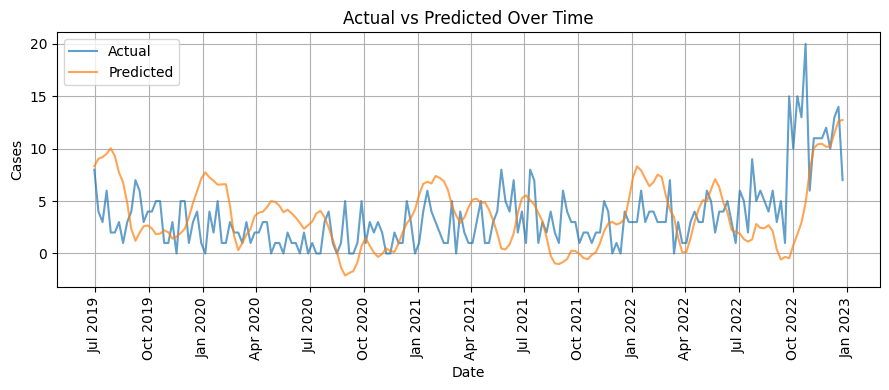


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.4973
   MAE: 1.8893
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


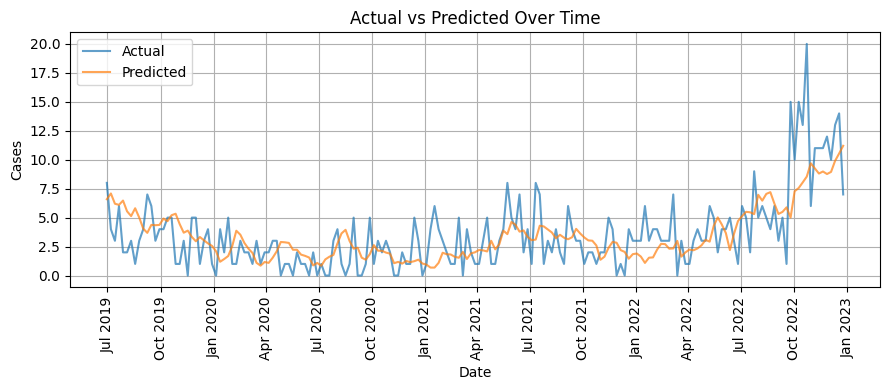


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 74ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.4416
   MAE: 1.7716
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


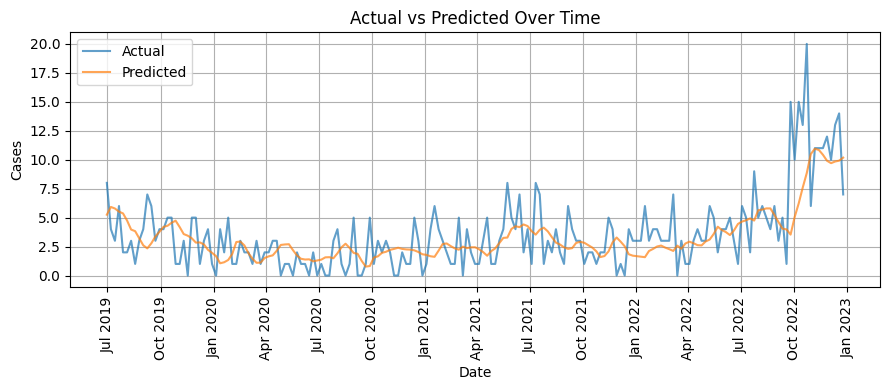


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.7085
   MAE: 2.0032
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


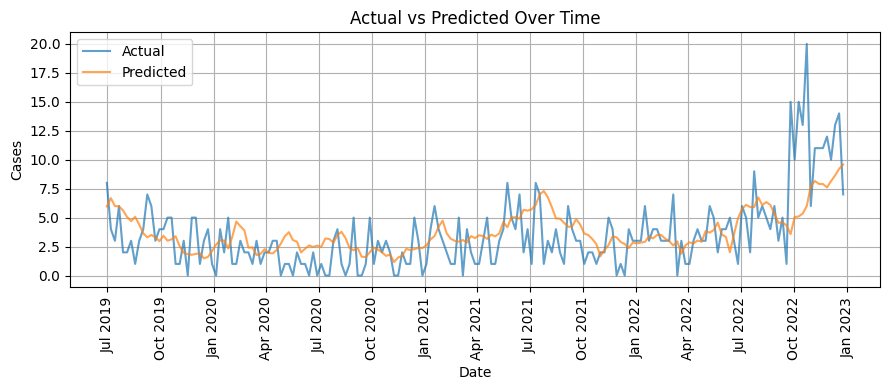


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.4569
   MAE: 1.8612
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


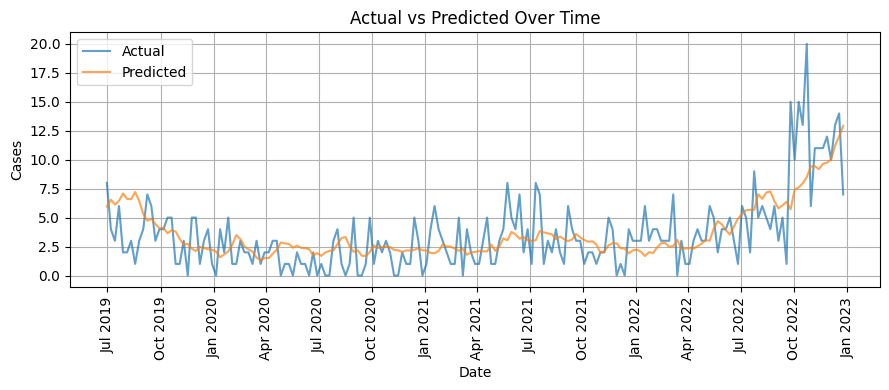


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6012
   MAE: 2.0425
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


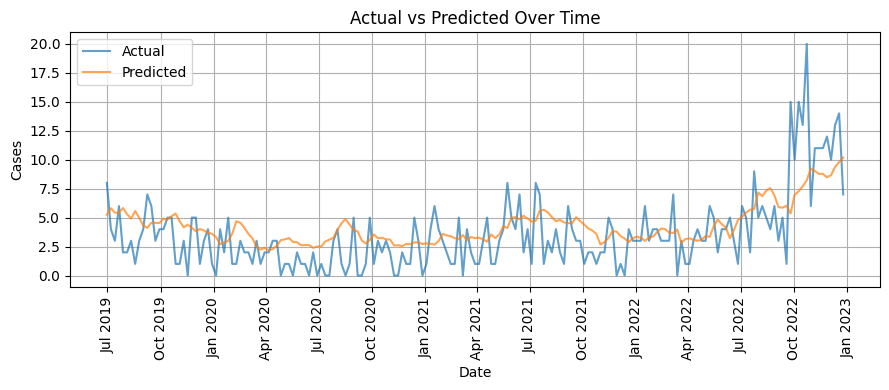


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5119
   MAE: 1.8623
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


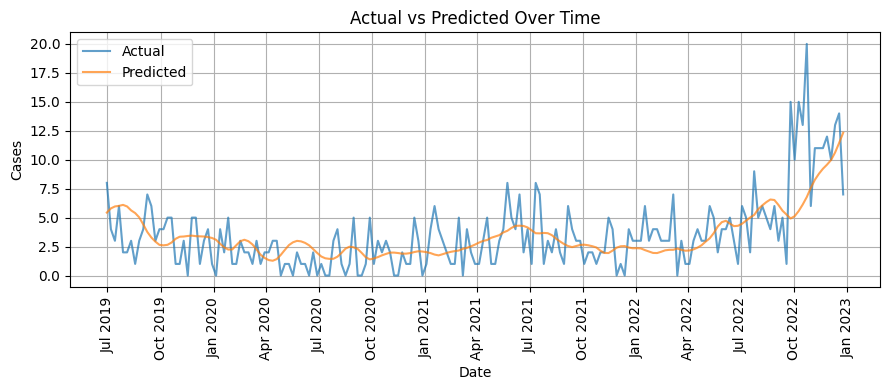


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
   📊 --- Model Evaluation ---
   RMSE: 12.4959
   MAE: 9.8369
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


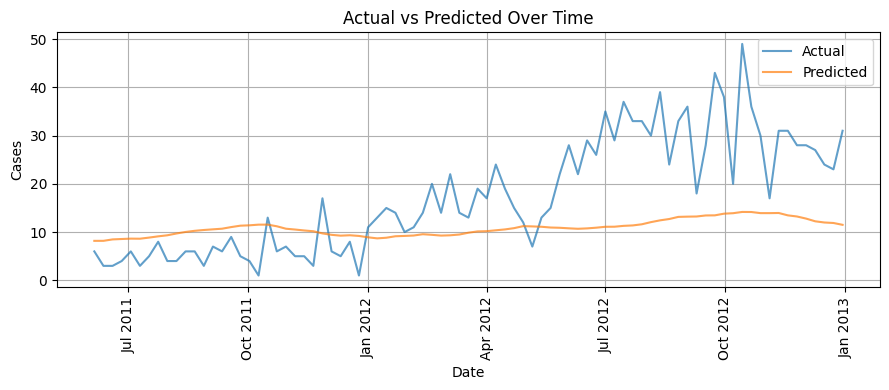


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
   📊 --- Model Evaluation ---
   RMSE: 12.0924
   MAE: 9.4347
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


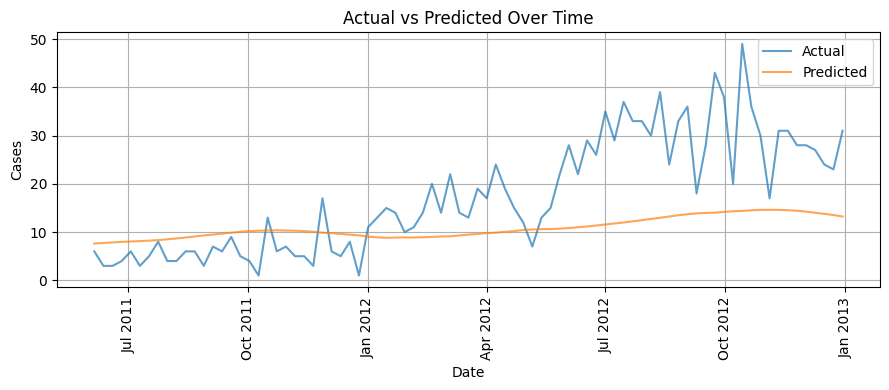


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
   📊 --- Model Evaluation ---
   RMSE: 12.3139
   MAE: 9.3457
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


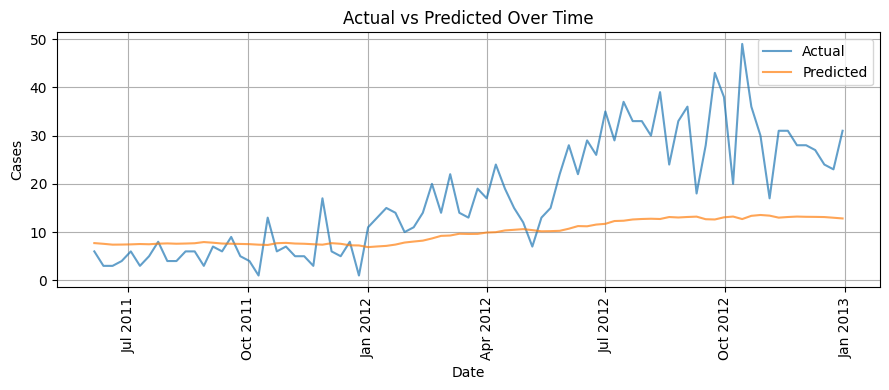


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
   📊 --- Model Evaluation ---
   RMSE: 14.0043
   MAE: 10.6801
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


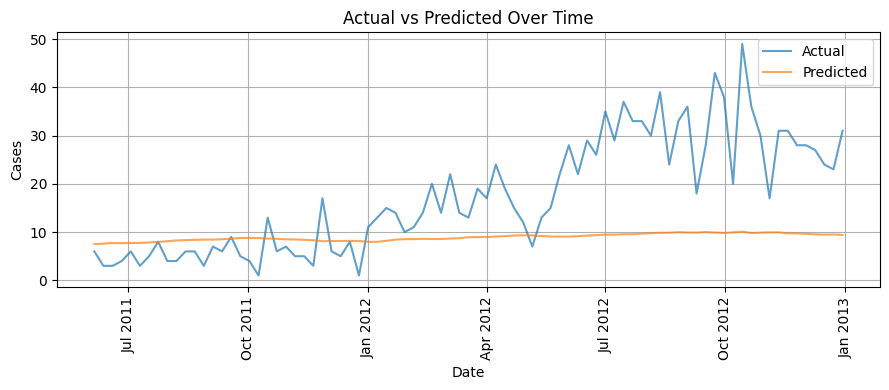


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
   📊 --- Model Evaluation ---
   RMSE: 12.2534
   MAE: 9.5507
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


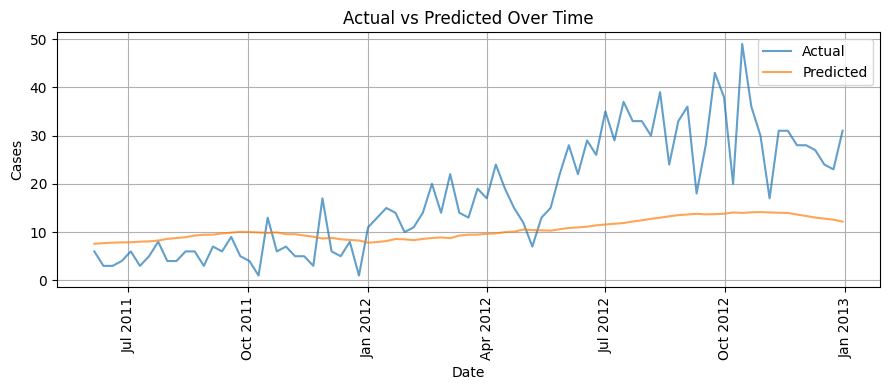


🔹 Ejecutando: use_log=False | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step
   📊 --- Model Evaluation ---
   RMSE: 13.3776
   MAE: 10.2740
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


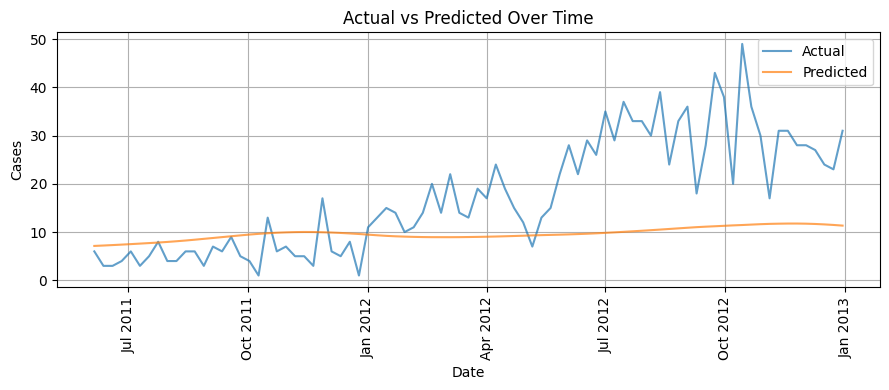


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
   📊 --- Model Evaluation ---
   RMSE: 9.2213
   MAE: 8.0804
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


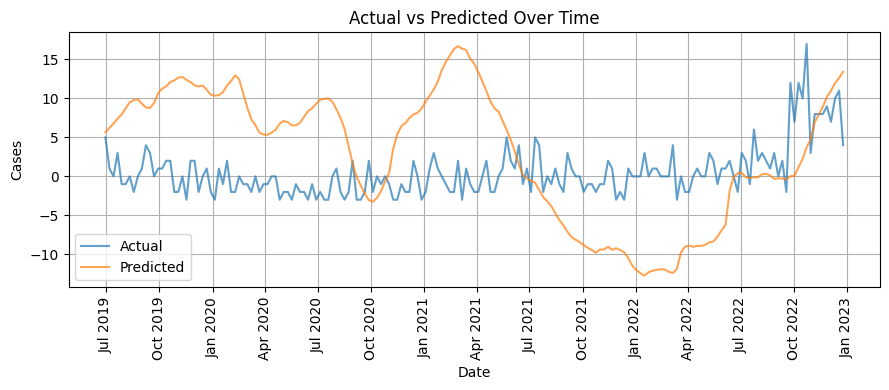


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
   📊 --- Model Evaluation ---
   RMSE: 8.2867
   MAE: 6.4836
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


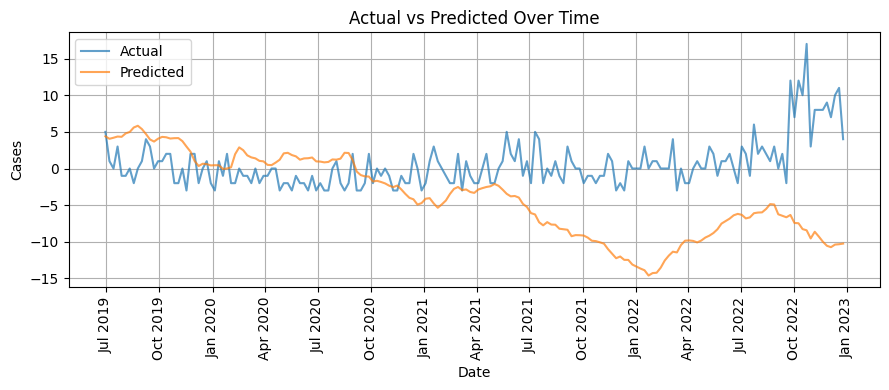


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
   📊 --- Model Evaluation ---
   RMSE: 42.0328
   MAE: 37.9407
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


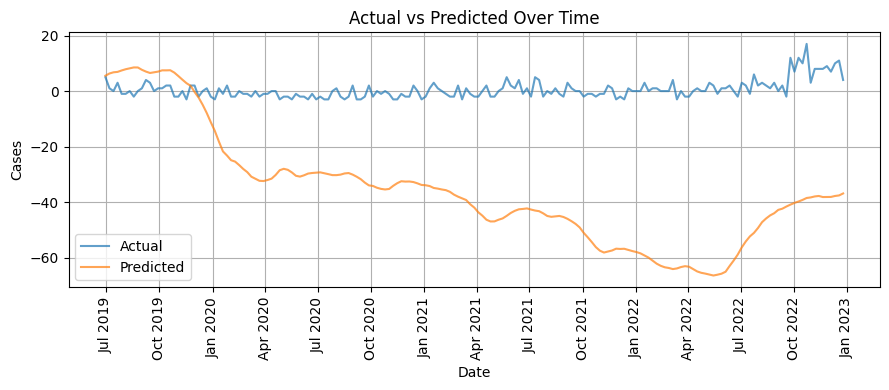


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
   📊 --- Model Evaluation ---
   RMSE: 165.7378
   MAE: 139.8944
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


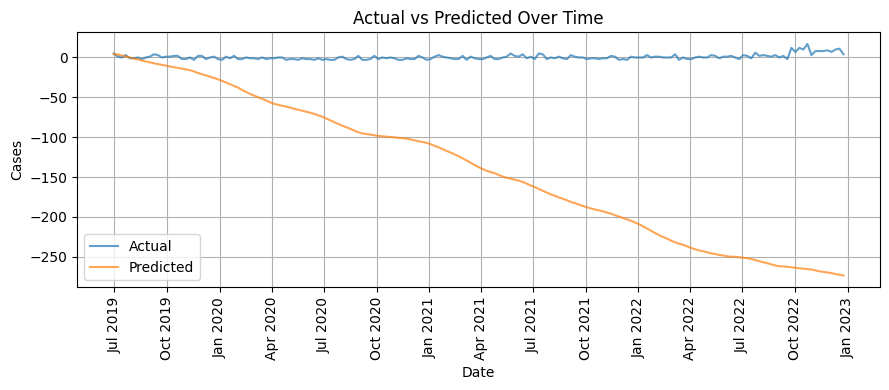


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
   📊 --- Model Evaluation ---
   RMSE: 9.6201
   MAE: 8.5734
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


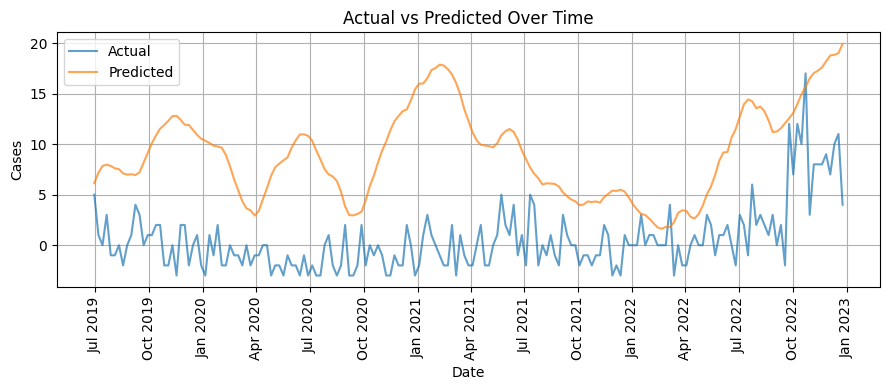


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step
   📊 --- Model Evaluation ---
   RMSE: 23.9132
   MAE: 21.4533
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


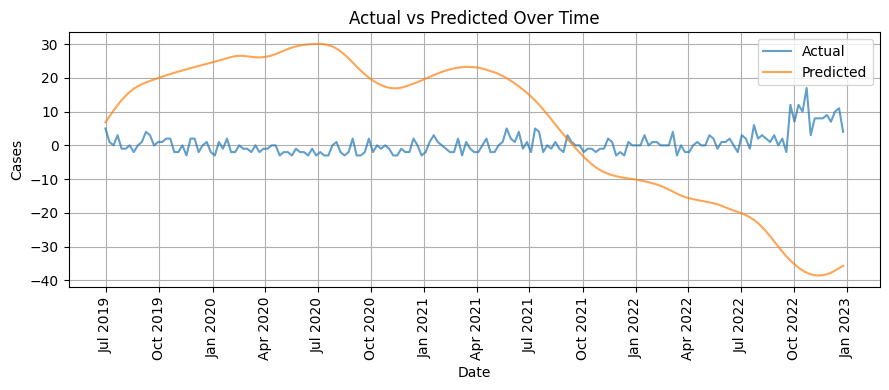


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
   📊 --- Model Evaluation ---
   RMSE: 20.0211
   MAE: 16.6943
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


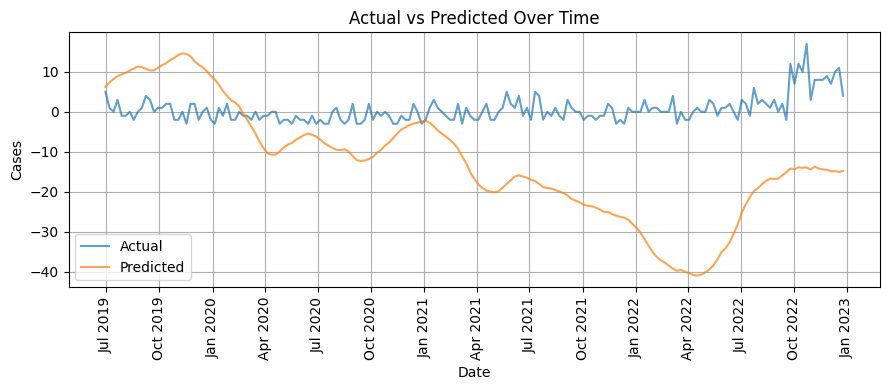


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step
   📊 --- Model Evaluation ---
   RMSE: 30.7498
   MAE: 25.0620
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


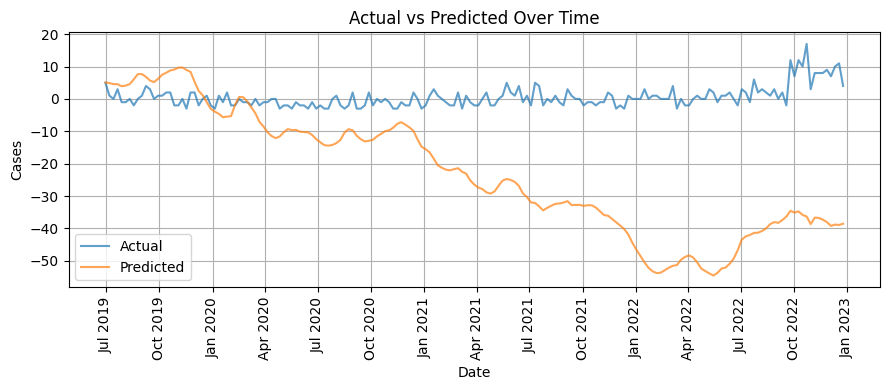


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
   📊 --- Model Evaluation ---
   RMSE: 25.3791
   MAE: 22.1293
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


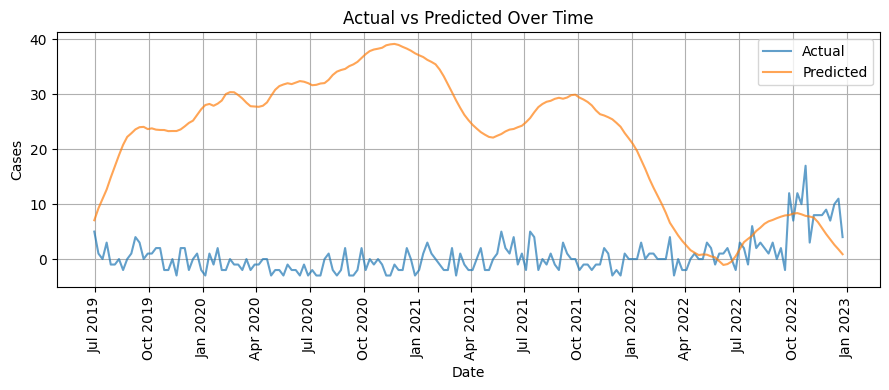


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
   📊 --- Model Evaluation ---
   RMSE: 12.1396
   MAE: 9.9652
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


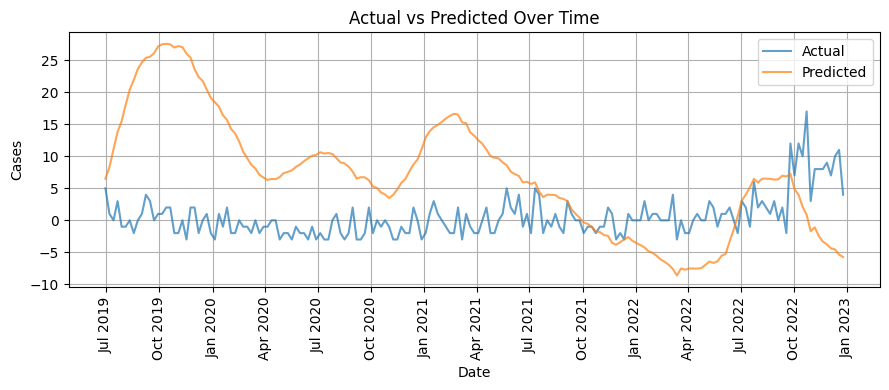


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
   📊 --- Model Evaluation ---
   RMSE: 8.1814
   MAE: 6.6717
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


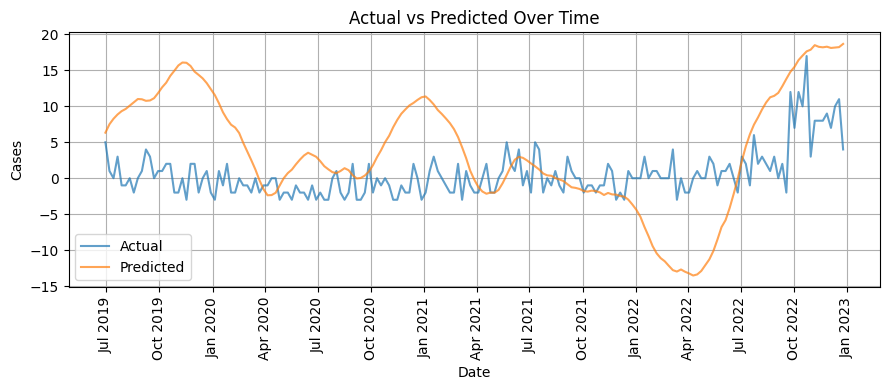


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step
   📊 --- Model Evaluation ---
   RMSE: 11.6149
   MAE: 10.6895
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


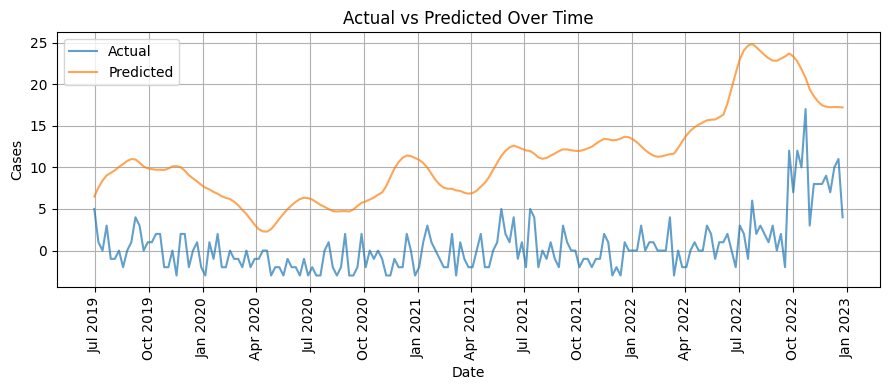


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
   📊 --- Model Evaluation ---
   RMSE: 22.0007
   MAE: 18.8322
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


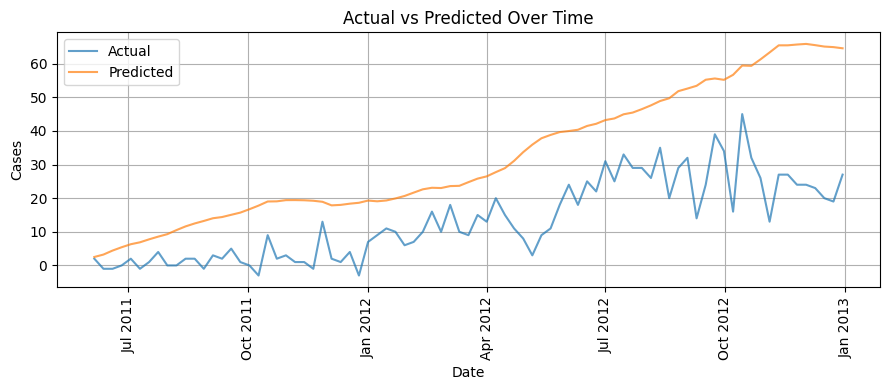


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 166ms/step
   📊 --- Model Evaluation ---
   RMSE: 26.9296
   MAE: 21.1288
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


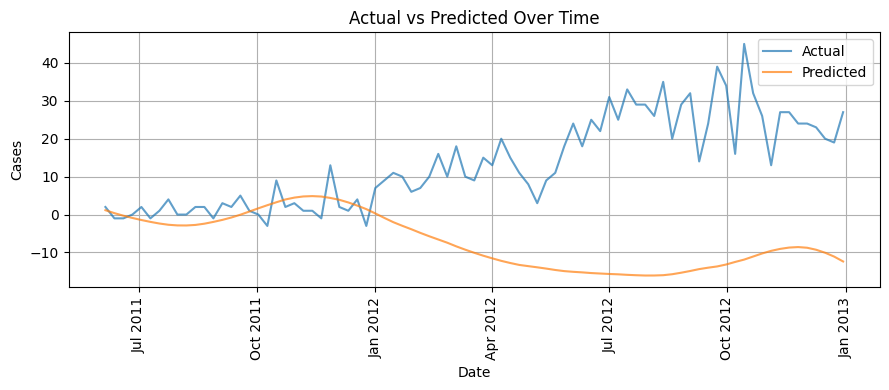


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step
   📊 --- Model Evaluation ---
   RMSE: 11.5211
   MAE: 9.6025
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


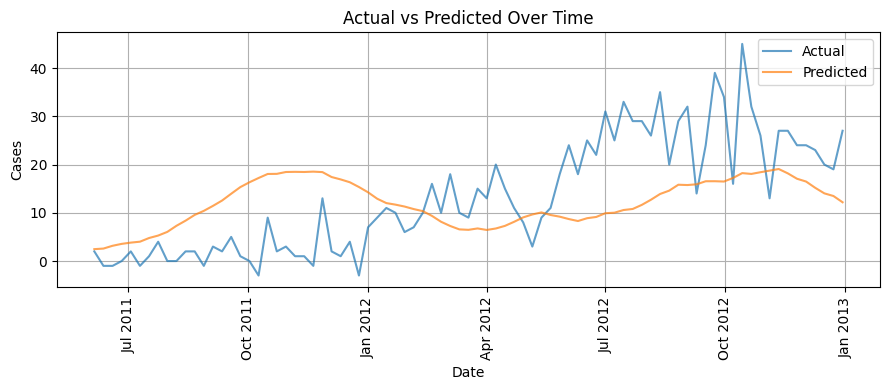


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
   📊 --- Model Evaluation ---
   RMSE: 17.9310
   MAE: 15.5245
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


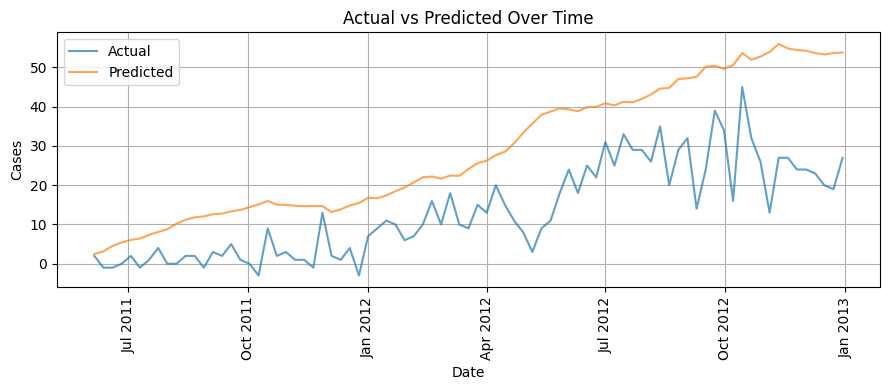


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
   📊 --- Model Evaluation ---
   RMSE: 49.2725
   MAE: 44.1828
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


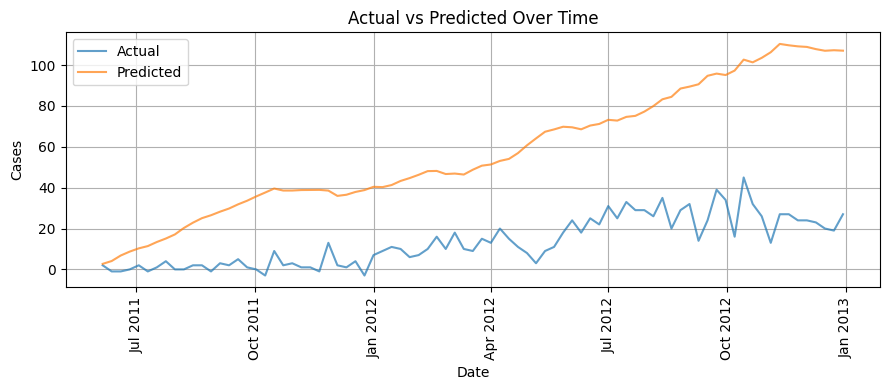


🔹 Ejecutando: use_log=False | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 240ms/step
   📊 --- Model Evaluation ---
   RMSE: 11.9047
   MAE: 9.9752
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


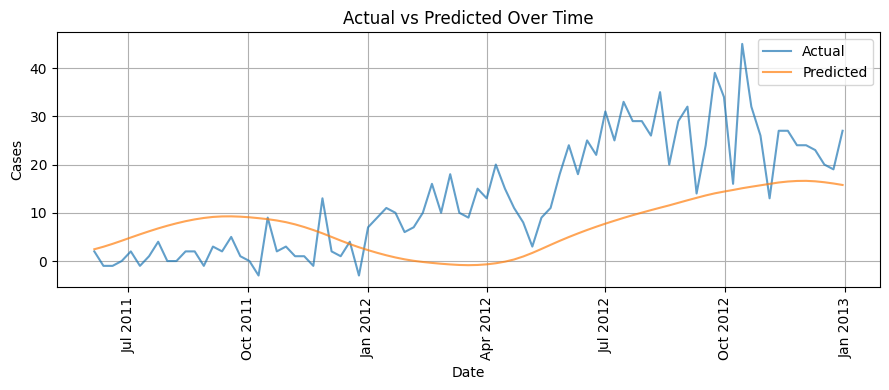


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
   📊 --- Model Evaluation ---
   RMSE: 6332.3473
   MAE: 4852.6137
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


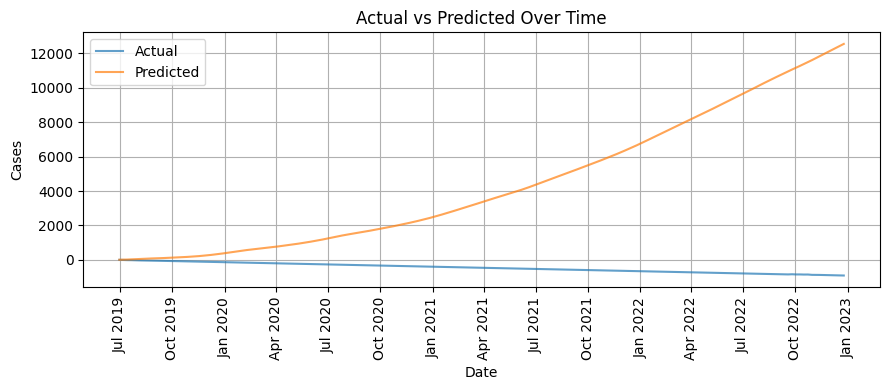


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step
   📊 --- Model Evaluation ---
   RMSE: 1309.0769
   MAE: 1152.1973
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


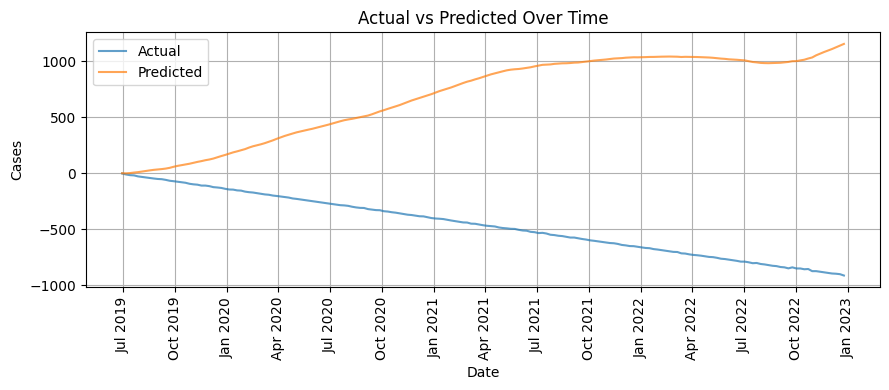


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step
   📊 --- Model Evaluation ---
   RMSE: 4338.4794
   MAE: 3534.9669
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


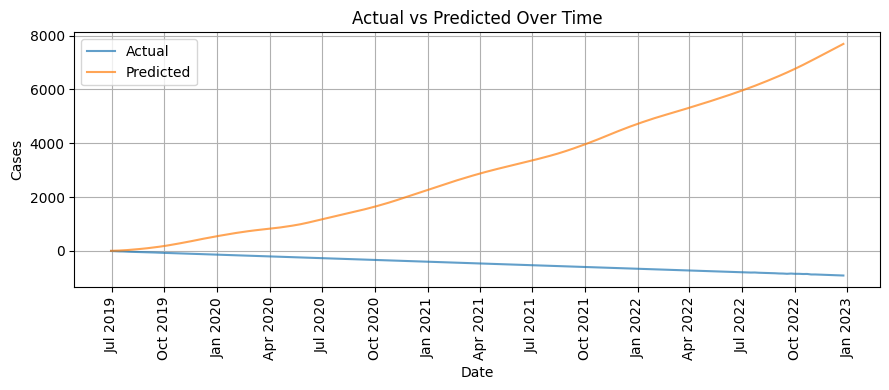


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
   📊 --- Model Evaluation ---
   RMSE: 3360.7005
   MAE: 2685.4061
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


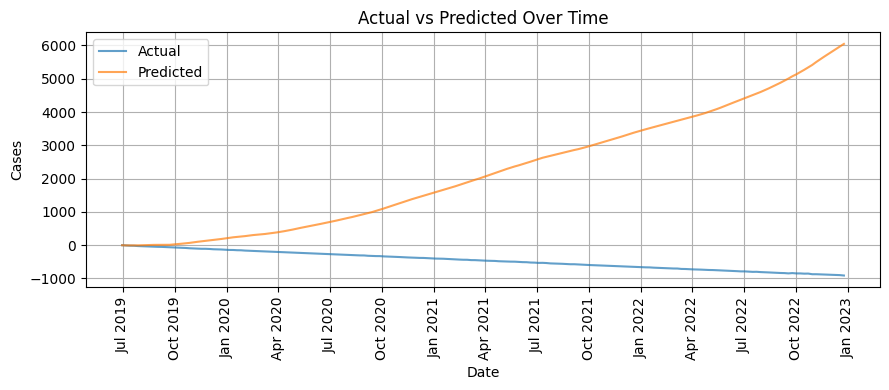


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
   📊 --- Model Evaluation ---
   RMSE: 703.6522
   MAE: 596.9921
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


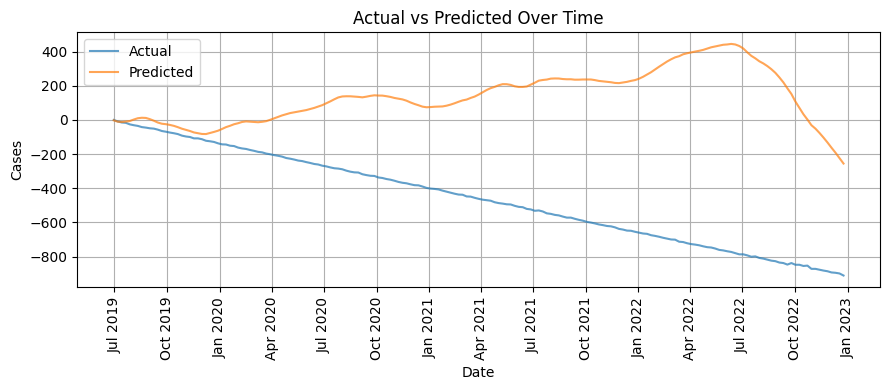


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step
   📊 --- Model Evaluation ---
   RMSE: 203.2864
   MAE: 187.4237
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


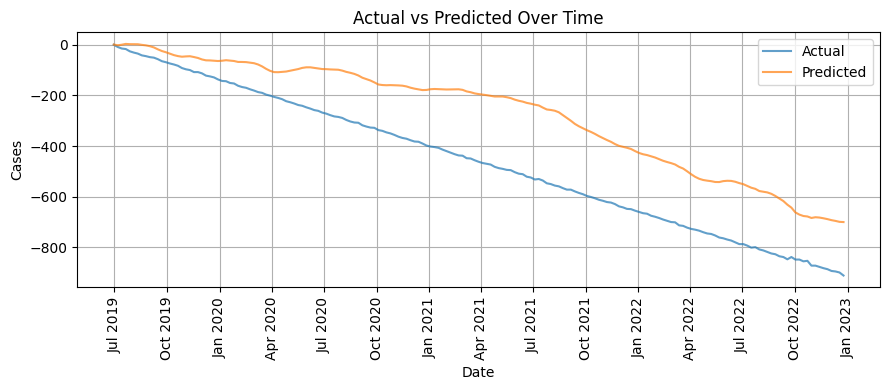


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
   📊 --- Model Evaluation ---
   RMSE: 2913.2702
   MAE: 1994.4981
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


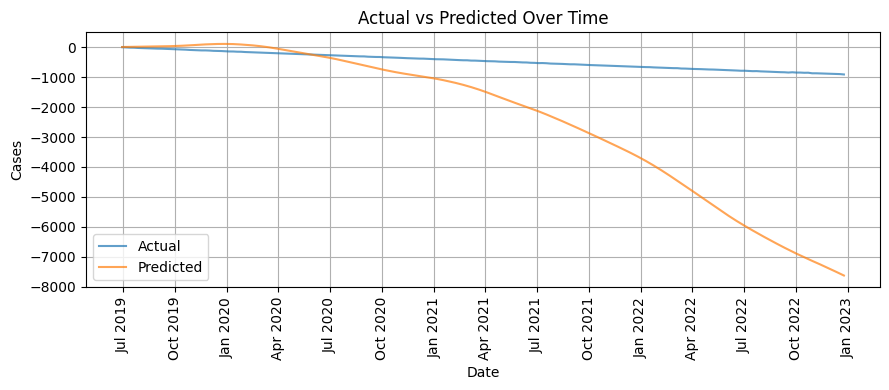


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step
   📊 --- Model Evaluation ---
   RMSE: 1193.9638
   MAE: 987.5860
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


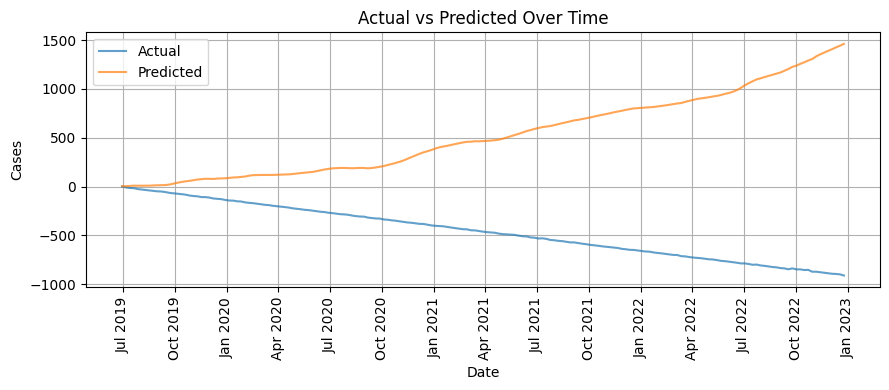


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step
   📊 --- Model Evaluation ---
   RMSE: 1065.2370
   MAE: 919.3606
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


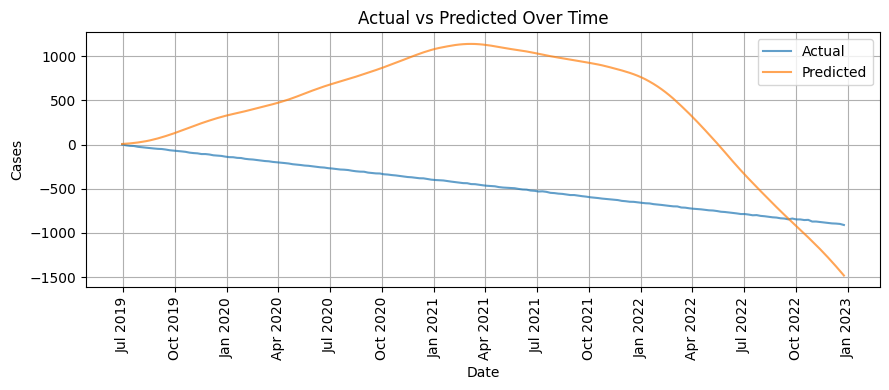


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
   📊 --- Model Evaluation ---
   RMSE: 4311.1536
   MAE: 3464.5665
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


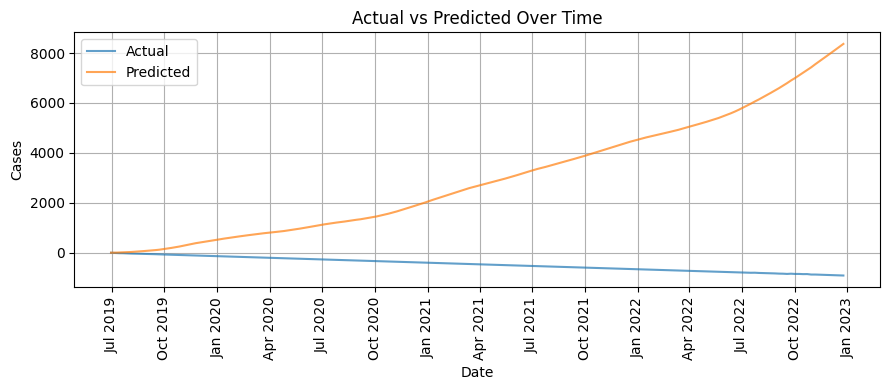


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
   📊 --- Model Evaluation ---
   RMSE: 2313.3373
   MAE: 1930.5507
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


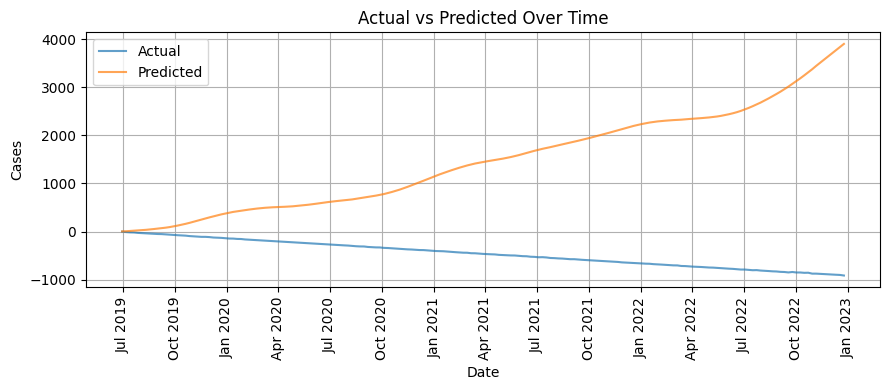


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 111ms/step
   📊 --- Model Evaluation ---
   RMSE: 4190.6962
   MAE: 3024.7121
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


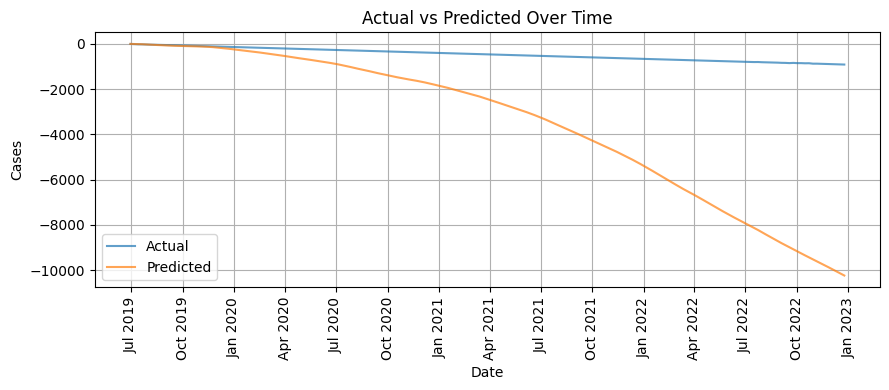


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
   📊 --- Model Evaluation ---
   RMSE: 1178.9032
   MAE: 900.7838
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


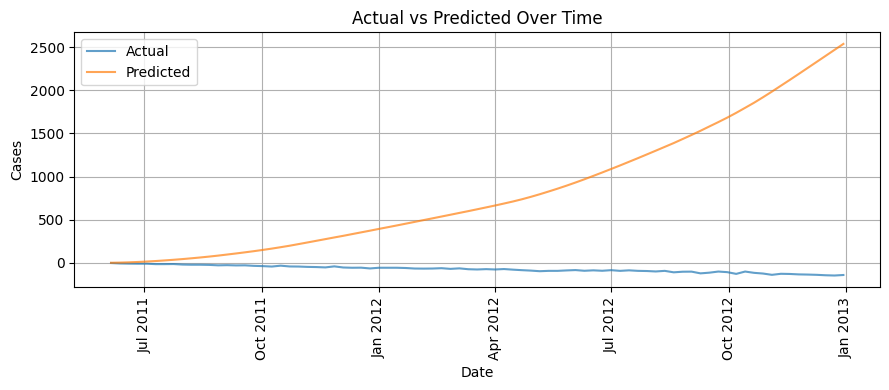


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step
   📊 --- Model Evaluation ---
   RMSE: 1489.7611
   MAE: 1074.9951
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


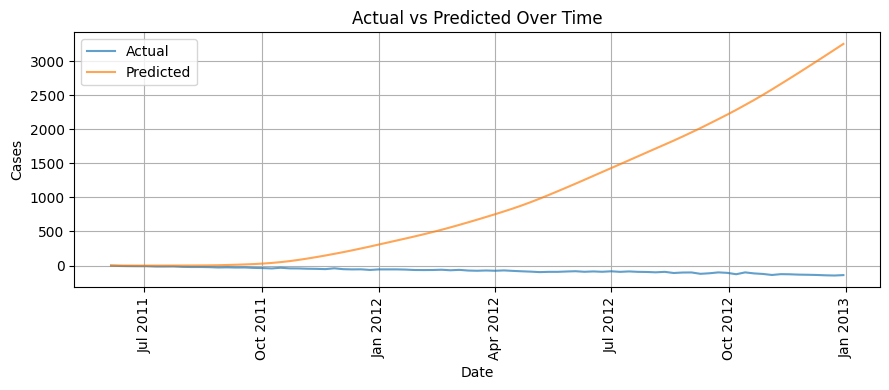


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step
   📊 --- Model Evaluation ---
   RMSE: 1888.7994
   MAE: 1526.7450
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


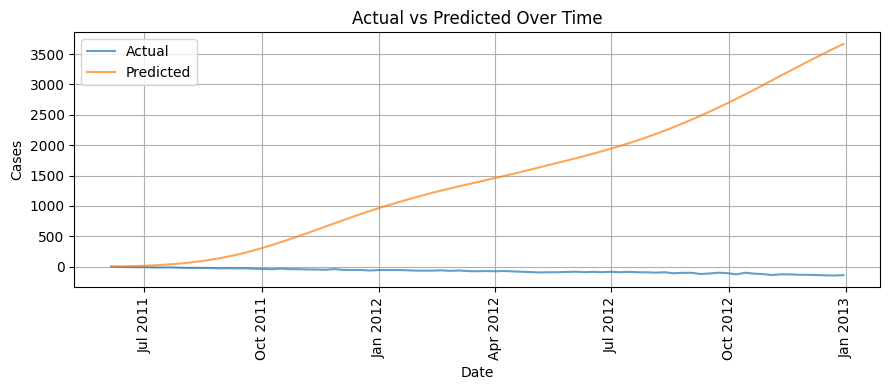


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step
   📊 --- Model Evaluation ---
   RMSE: 1072.1314
   MAE: 821.3470
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


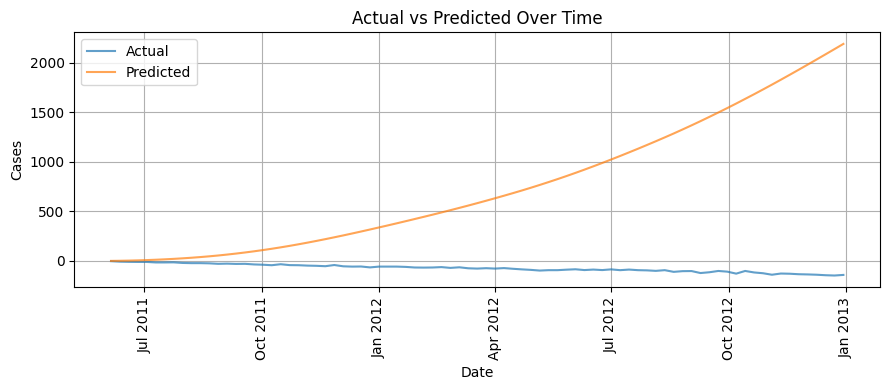


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
   📊 --- Model Evaluation ---
   RMSE: 1420.1463
   MAE: 1081.0999
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


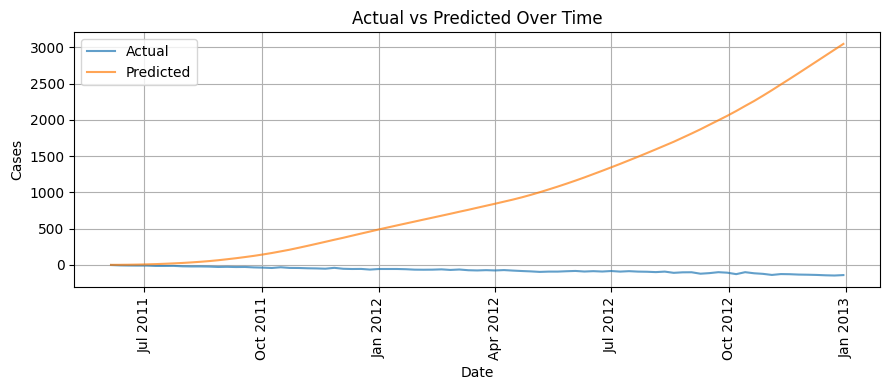


🔹 Ejecutando: use_log=False | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step
   📊 --- Model Evaluation ---
   RMSE: 1313.0060
   MAE: 973.1274
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


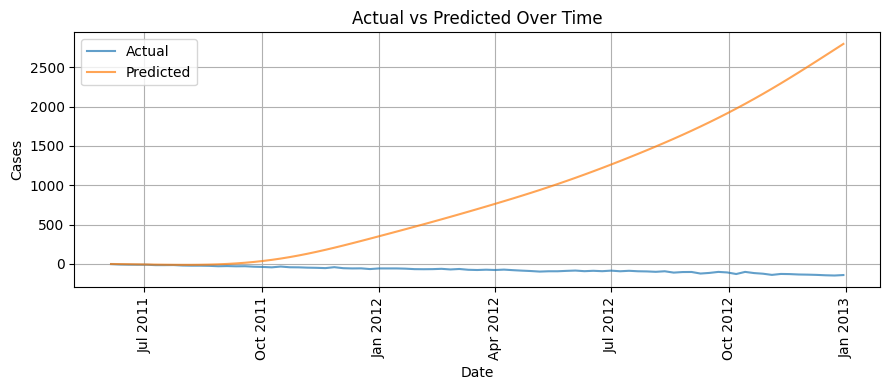


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5728
   MAE: 1.8205
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


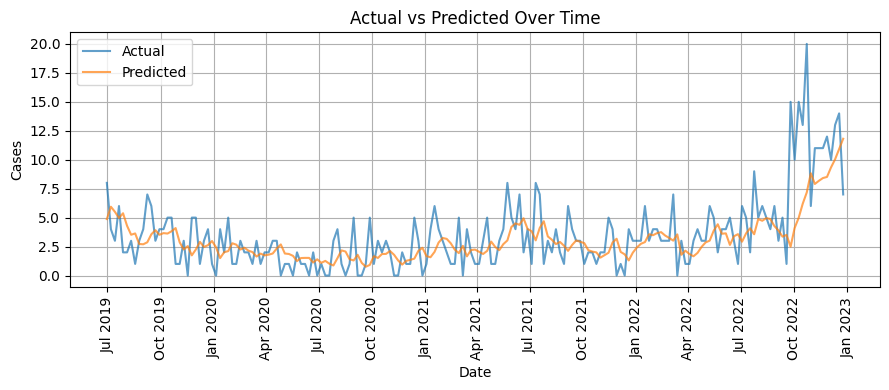


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5791
   MAE: 1.7887
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


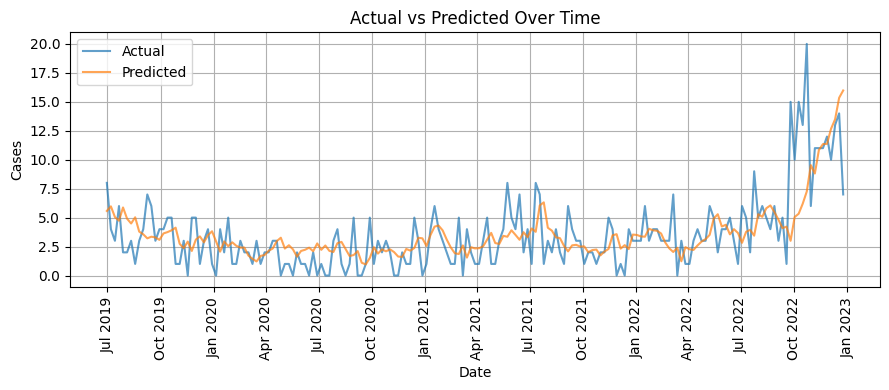


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6531
   MAE: 1.8473
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


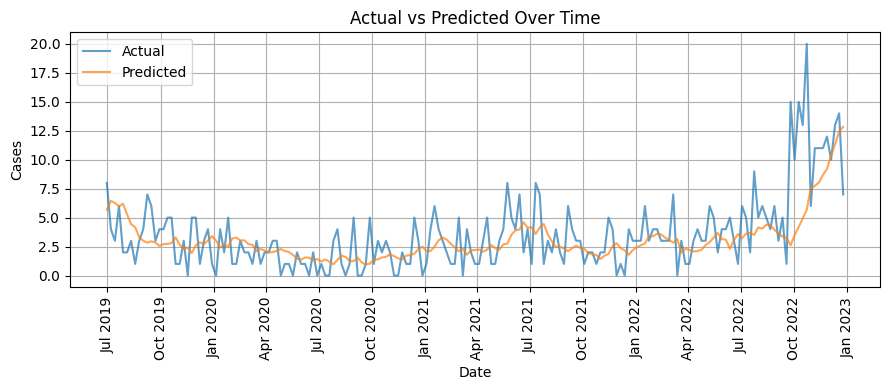


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5322
   MAE: 1.8034
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


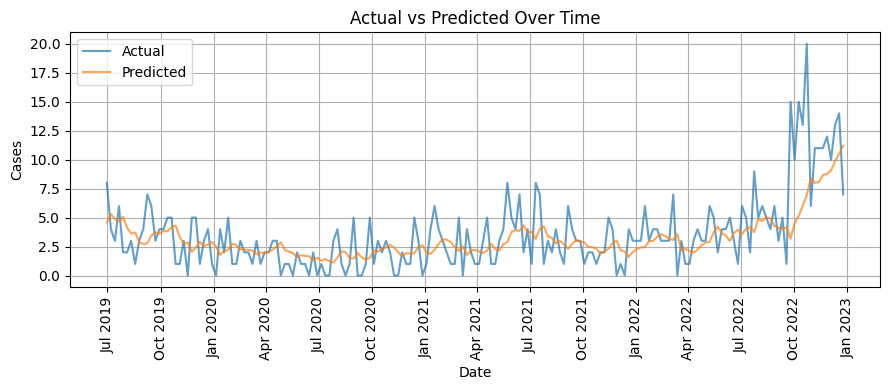


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6074
   MAE: 1.8446
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


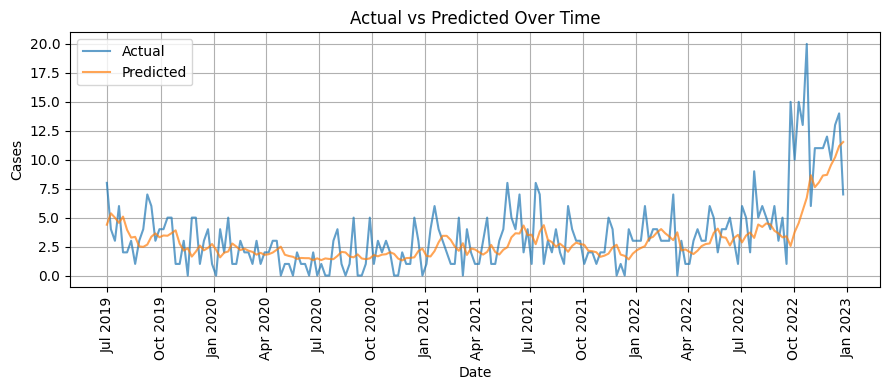


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5592
   MAE: 1.8093
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


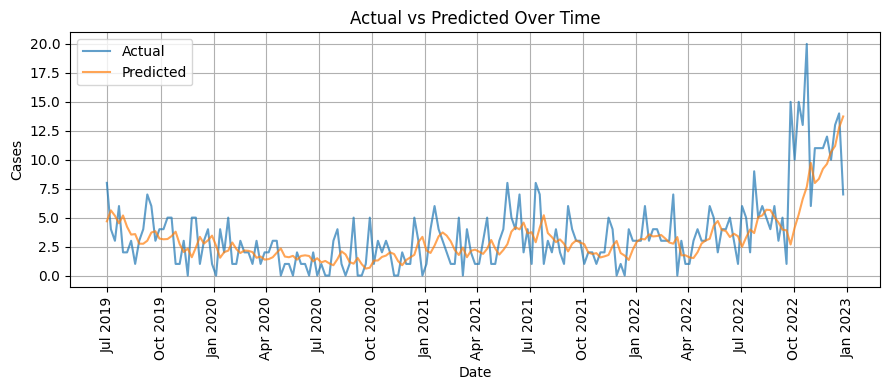


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.7002
   MAE: 1.8781
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


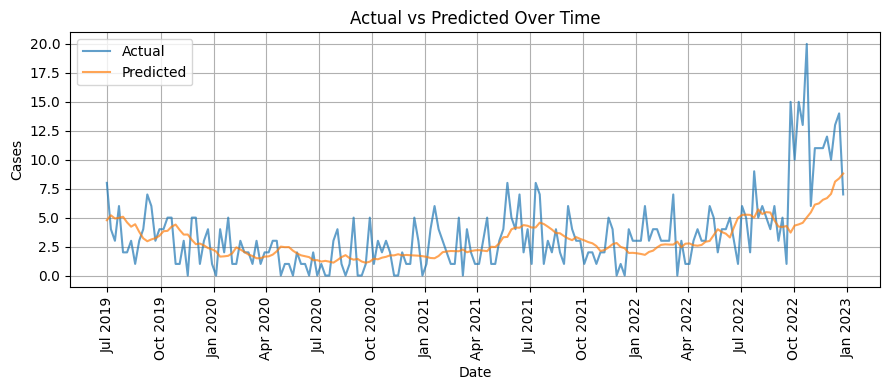


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.5770
   MAE: 1.8294
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


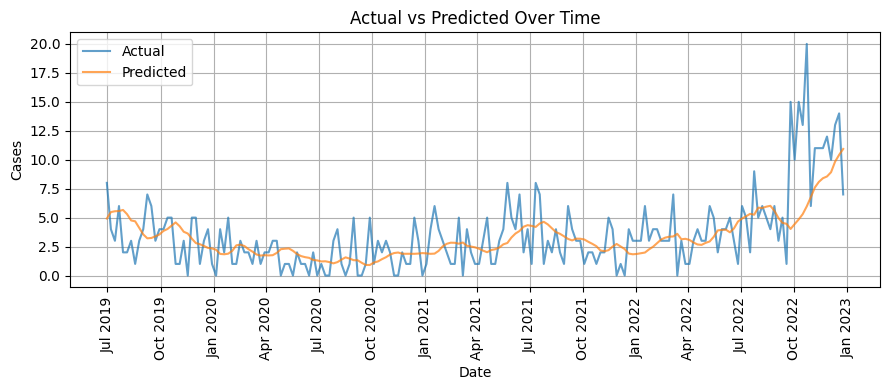


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.7931
   MAE: 1.9812
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


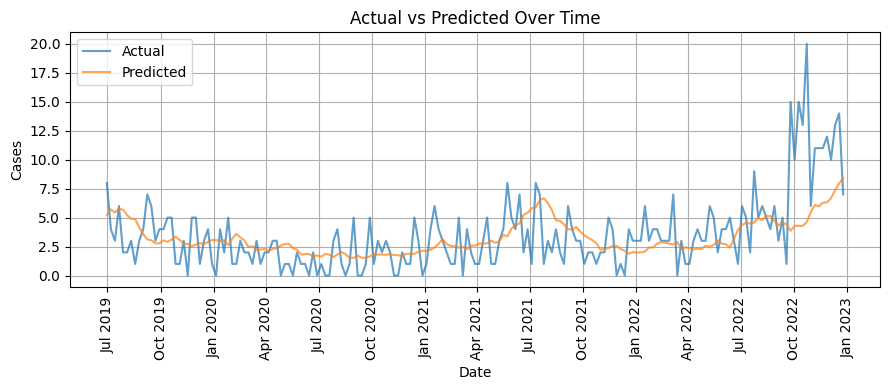


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6778
   MAE: 1.8963
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


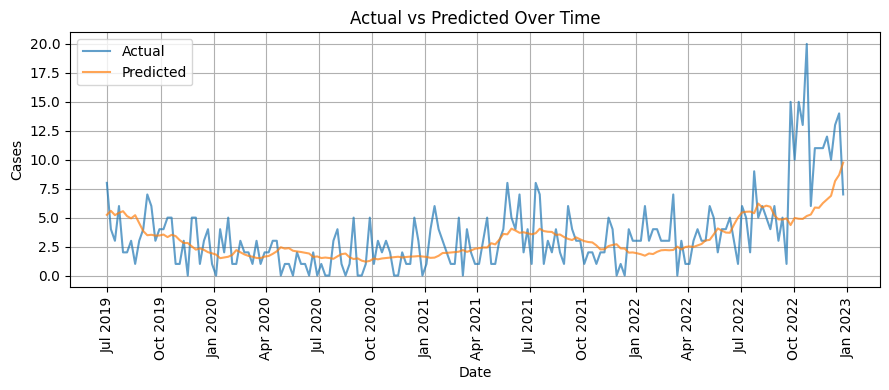


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.6513
   MAE: 1.8486
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


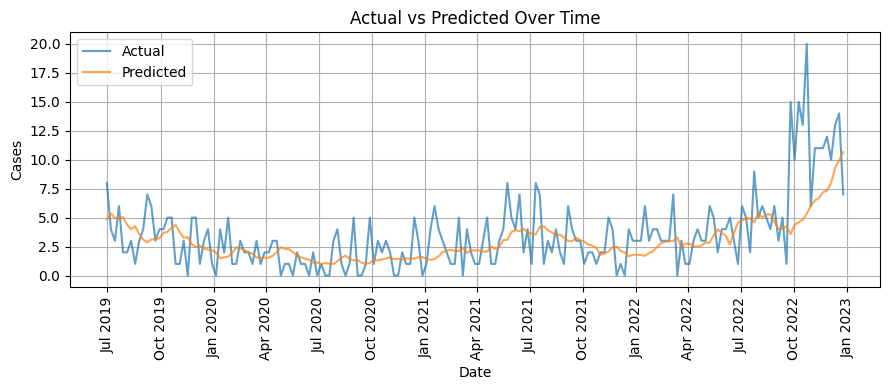


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.7585
   MAE: 1.9149
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


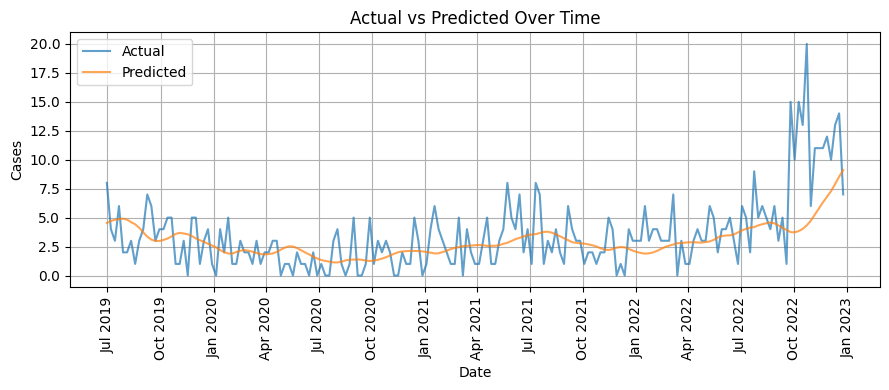


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
   📊 --- Model Evaluation ---
   RMSE: 9.4006
   MAE: 7.4604
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


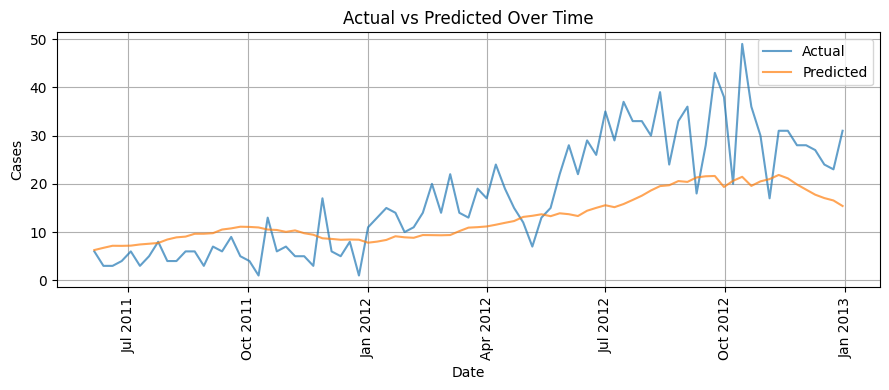


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
   📊 --- Model Evaluation ---
   RMSE: 7.7572
   MAE: 6.2549
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


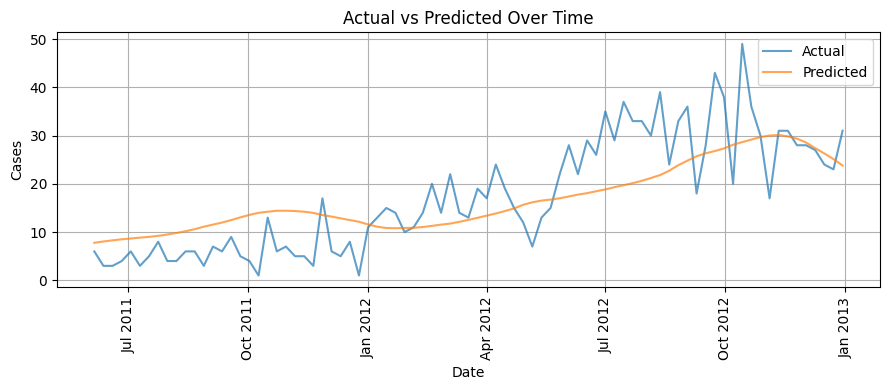


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
   📊 --- Model Evaluation ---
   RMSE: 7.9723
   MAE: 6.4629
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


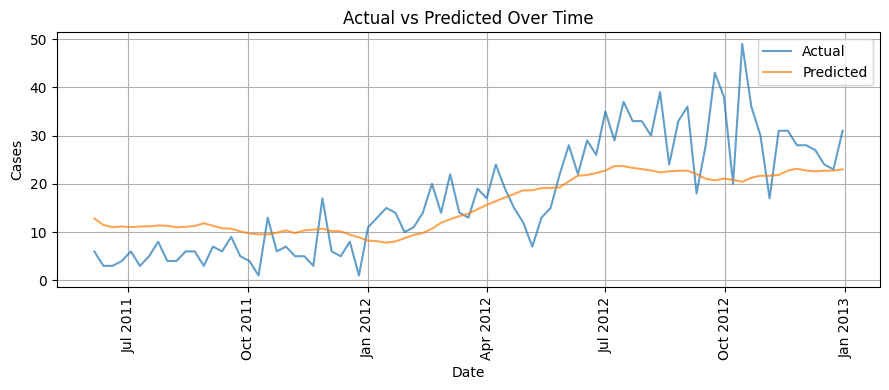


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
   📊 --- Model Evaluation ---
   RMSE: 11.9739
   MAE: 9.5064
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


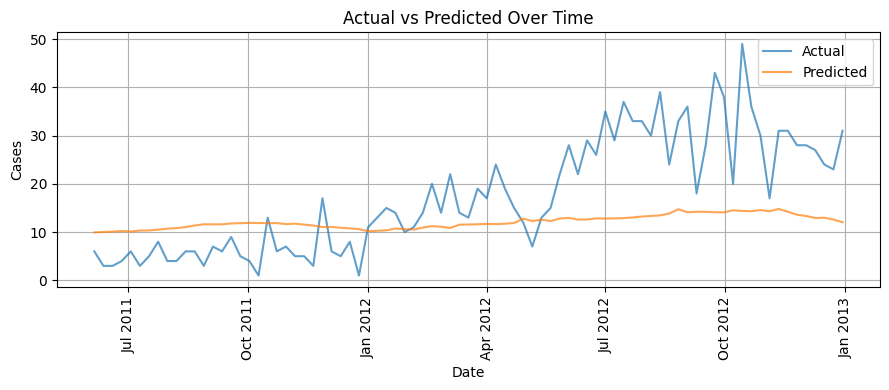


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
   📊 --- Model Evaluation ---
   RMSE: 8.2408
   MAE: 6.7388
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


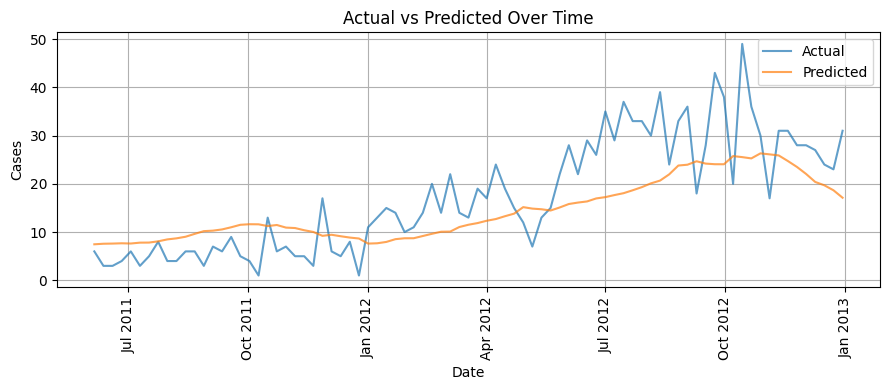


🔹 Ejecutando: use_log=True | target=absolute | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
   📊 --- Model Evaluation ---
   RMSE: 9.5958
   MAE: 7.5699
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


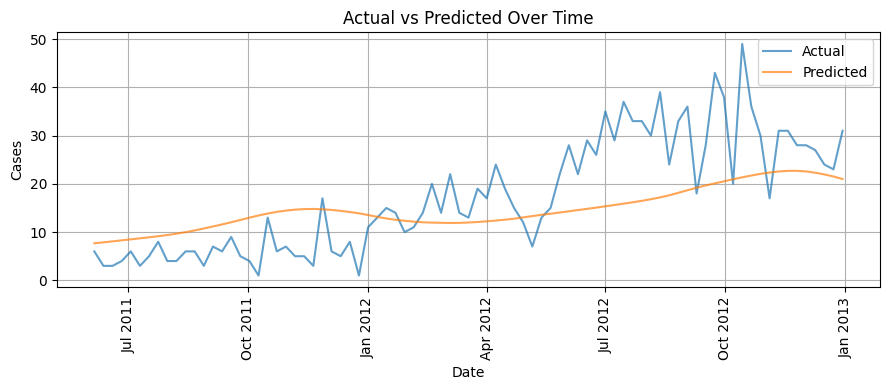


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
   📊 --- Model Evaluation ---
   RMSE: 235.0184
   MAE: 144.2579
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


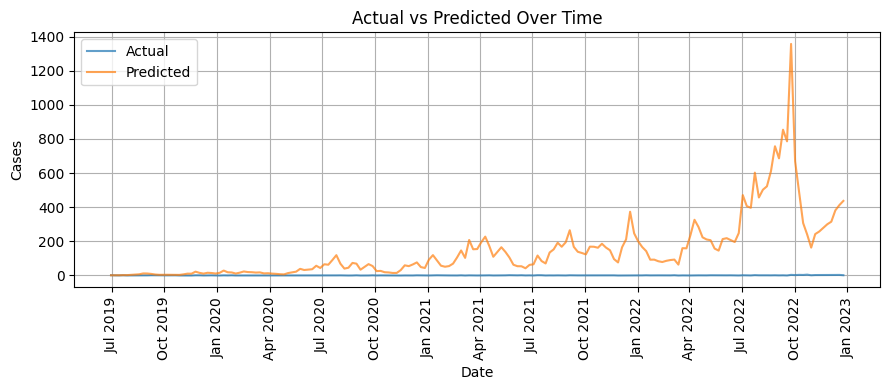


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
   📊 --- Model Evaluation ---
   RMSE: 44.9011
   MAE: 26.3921
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


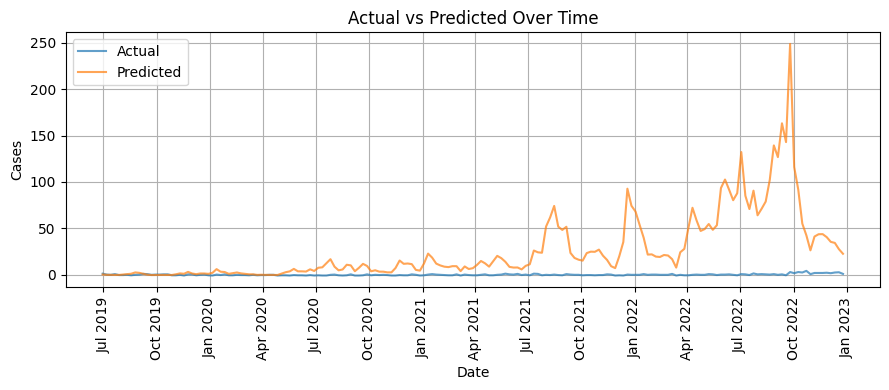


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
   📊 --- Model Evaluation ---
   RMSE: 1.8869
   MAE: 1.1785
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


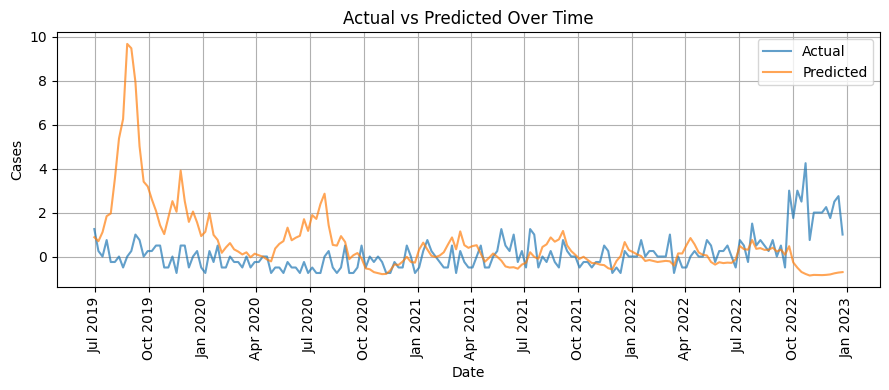


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
   📊 --- Model Evaluation ---
   RMSE: 31.3794
   MAE: 10.6148
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


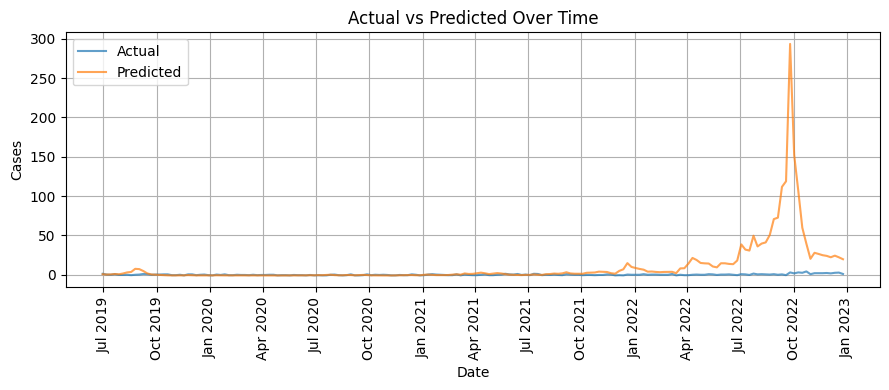


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
   📊 --- Model Evaluation ---
   RMSE: 1.2252
   MAE: 0.8588
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


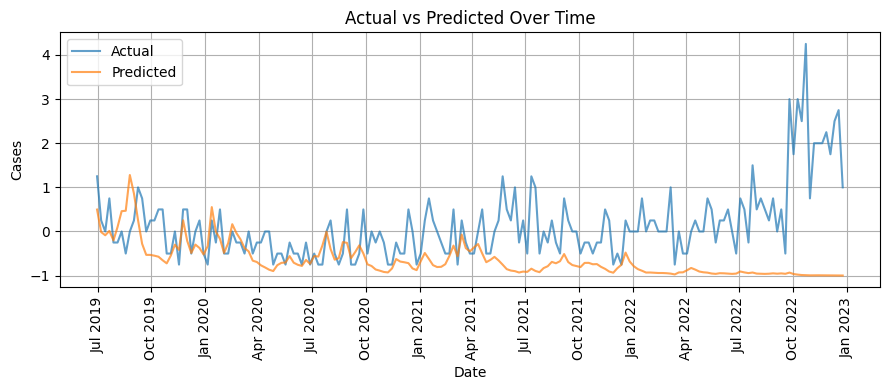


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step
   📊 --- Model Evaluation ---
   RMSE: 1.3265
   MAE: 1.0263
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


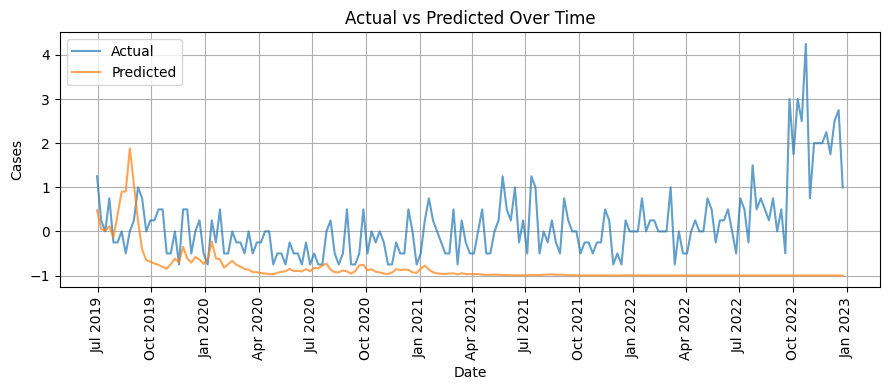


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.7968
   MAE: 2.0070
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


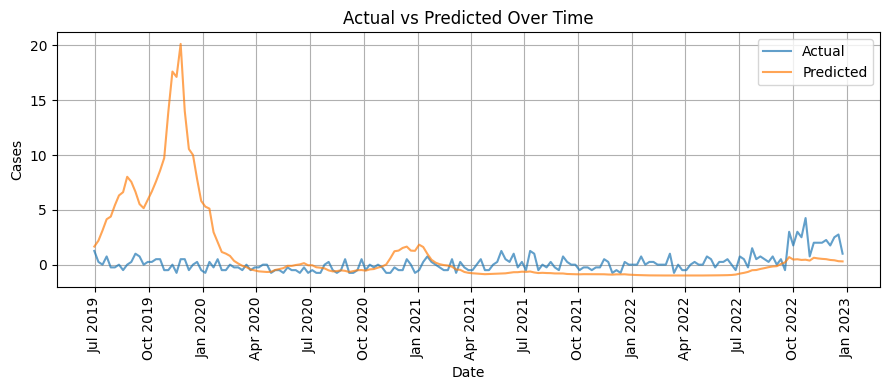


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
   📊 --- Model Evaluation ---
   RMSE: 85.5430
   MAE: 34.8768
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


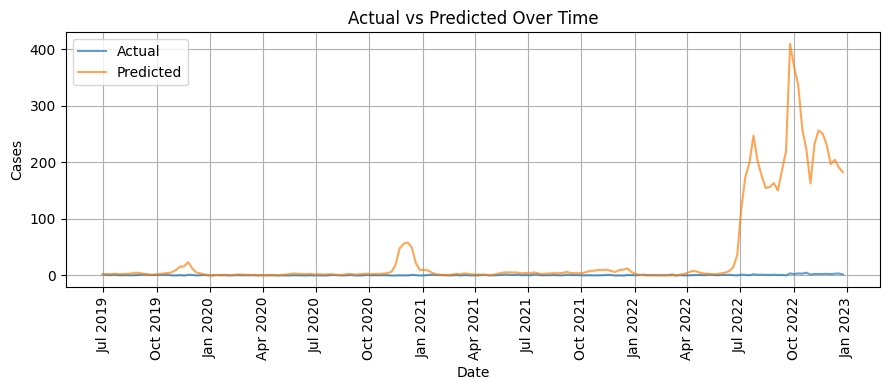


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
   📊 --- Model Evaluation ---
   RMSE: 97.2865
   MAE: 62.9268
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


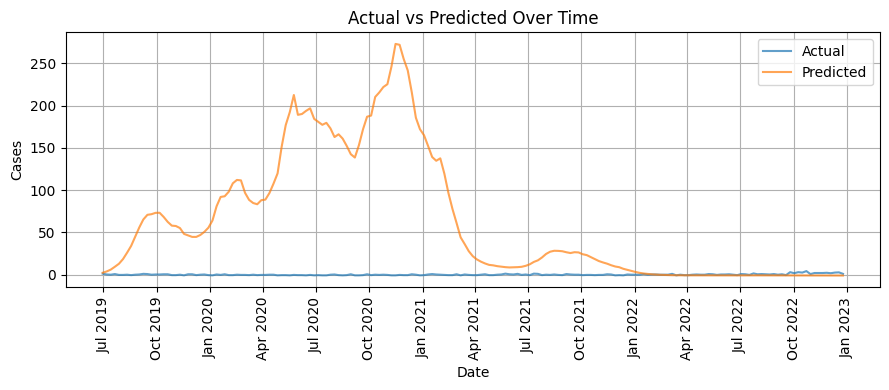


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.5906
   MAE: 1.8926
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


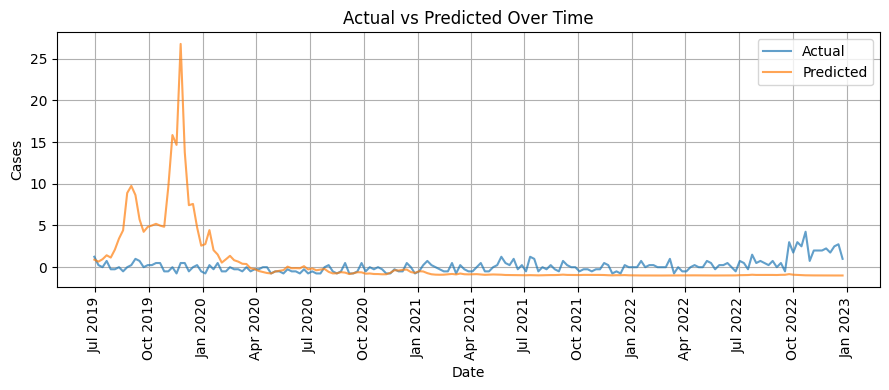


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
   📊 --- Model Evaluation ---
   RMSE: 2.4856
   MAE: 1.5584
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


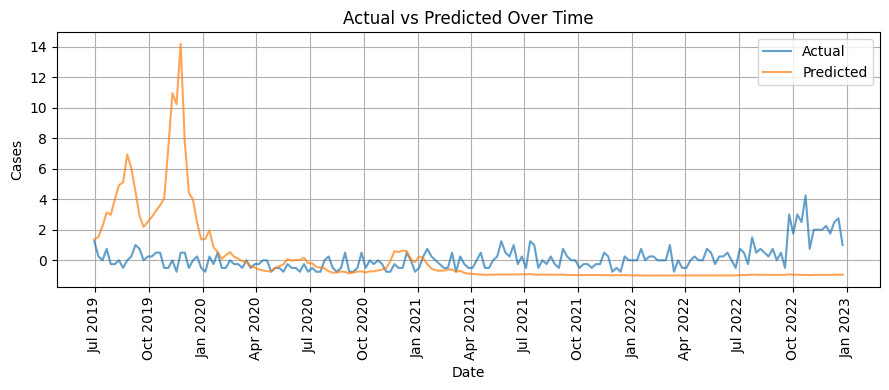


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step
   📊 --- Model Evaluation ---
   RMSE: 1.4675
   MAE: 1.1263
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


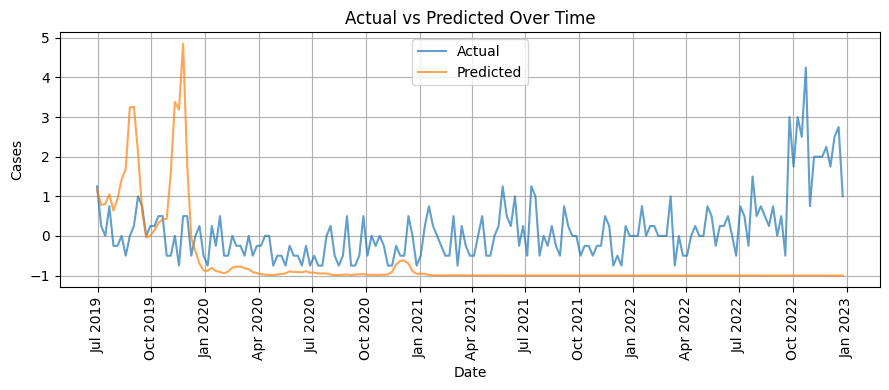


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.1647
   MAE: 2.3660
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


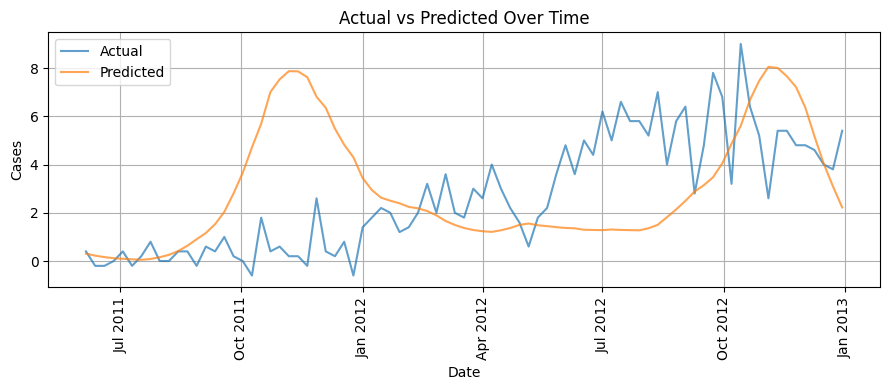


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
   📊 --- Model Evaluation ---
   RMSE: 133.8332
   MAE: 62.5244
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


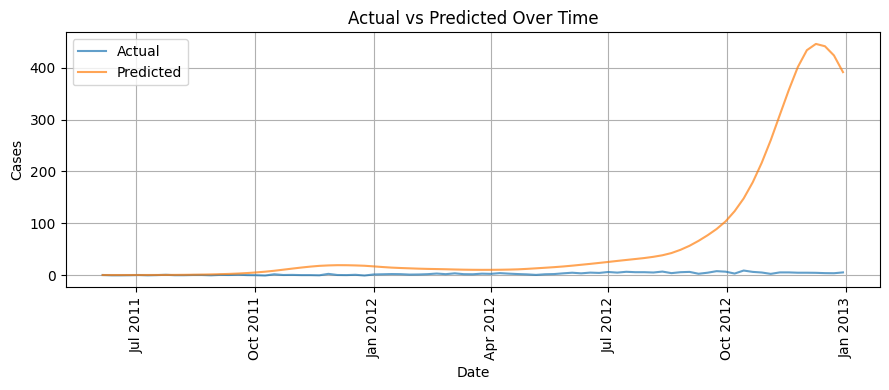


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.6415
   MAE: 3.1619
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


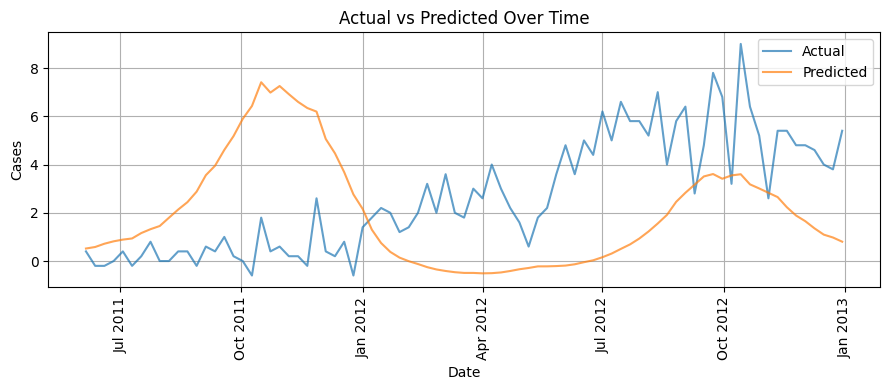


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
   📊 --- Model Evaluation ---
   RMSE: 8.1663
   MAE: 4.1139
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


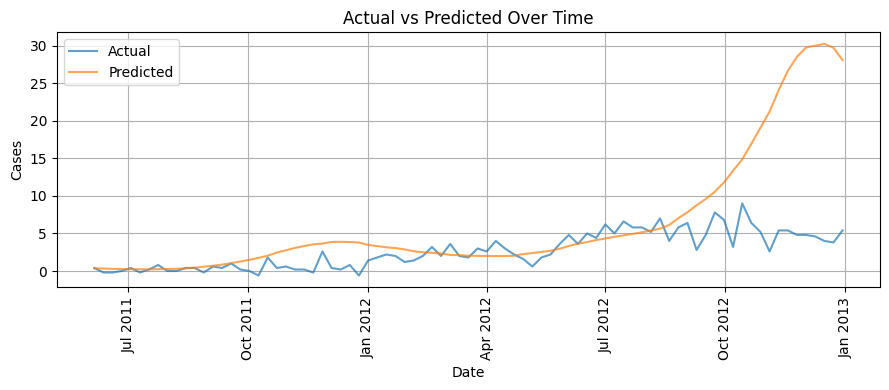


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.9854
   MAE: 3.2418
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


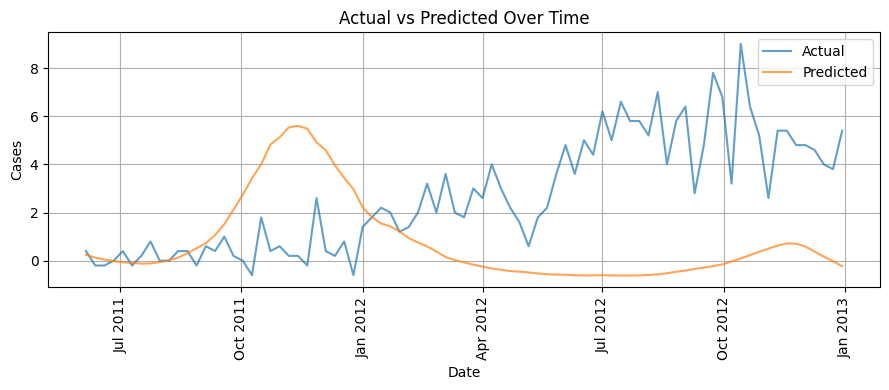


🔹 Ejecutando: use_log=True | target=diff1 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 185ms/step
   📊 --- Model Evaluation ---
   RMSE: 6.4978
   MAE: 3.7575
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


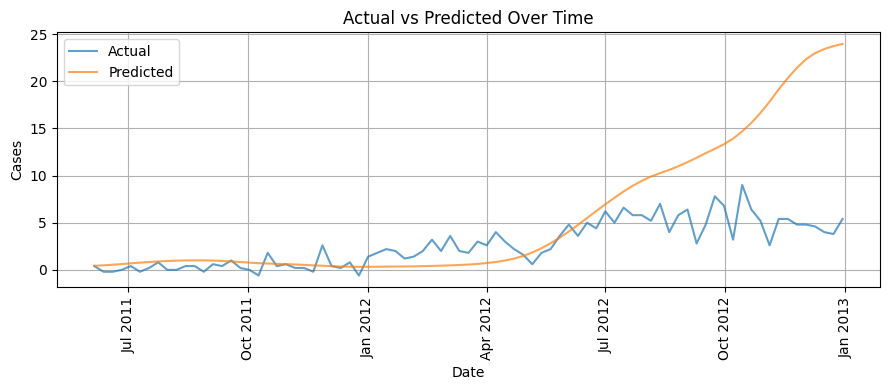


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0190
   MAE: 0.0028
   ✔️ Modelo candidato (RMSE ≤ 50% del naive)


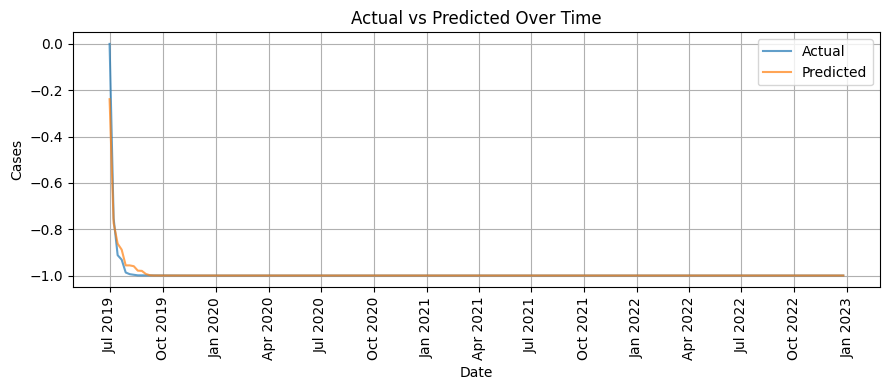


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0227
   MAE: 0.0025
   ✔️ Modelo candidato (RMSE ≤ 50% del naive)


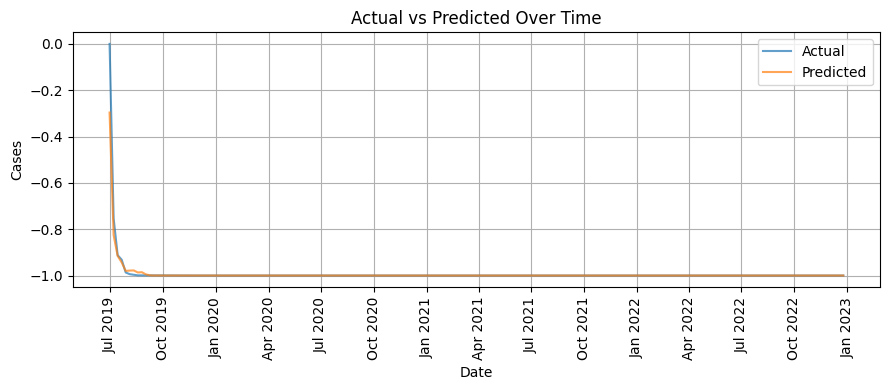


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0965
   MAE: 0.0191
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


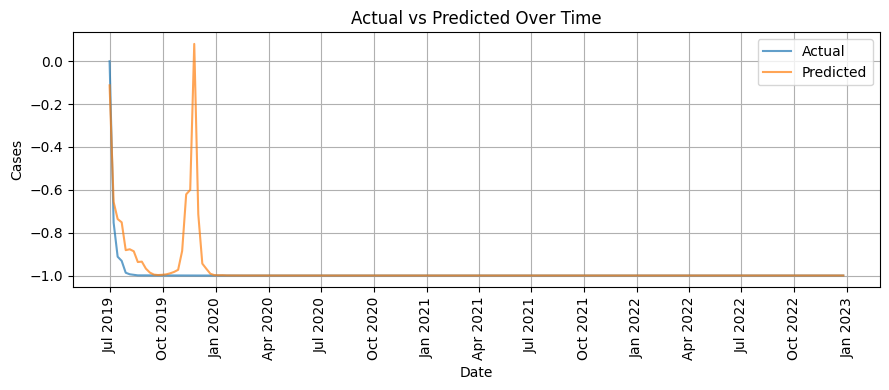


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0230
   MAE: 0.0024
   ✔️ Modelo candidato (RMSE ≤ 50% del naive)


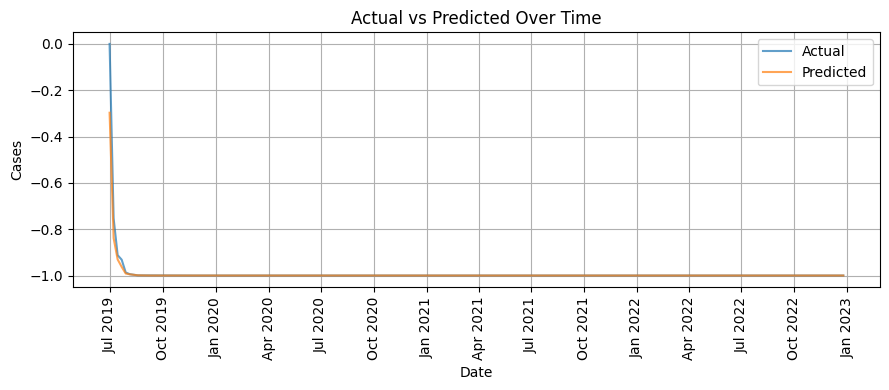


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0264
   MAE: 0.0060
   ✔️ Modelo candidato (RMSE ≤ 50% del naive)


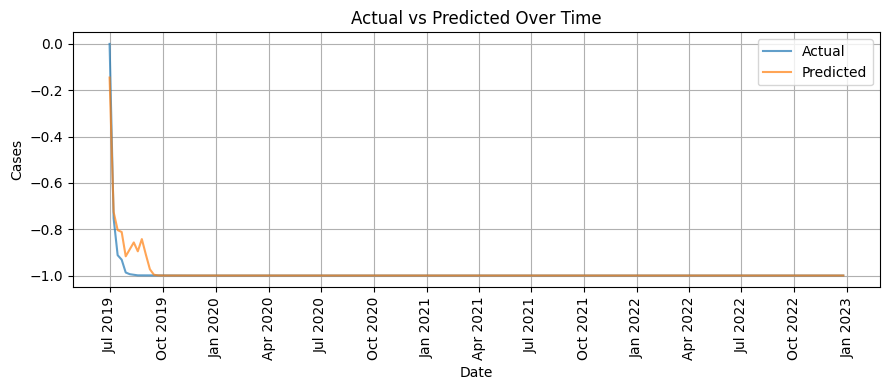


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2007-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step
   📊 --- Model Evaluation ---
   RMSE: 177584584193686408482961368610685338466642800886797542775181217463655645326256414315631345664.0000
   MAE: 17694923476468469452079235434865861718984321082005397045649194945264601492748526770259492864.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


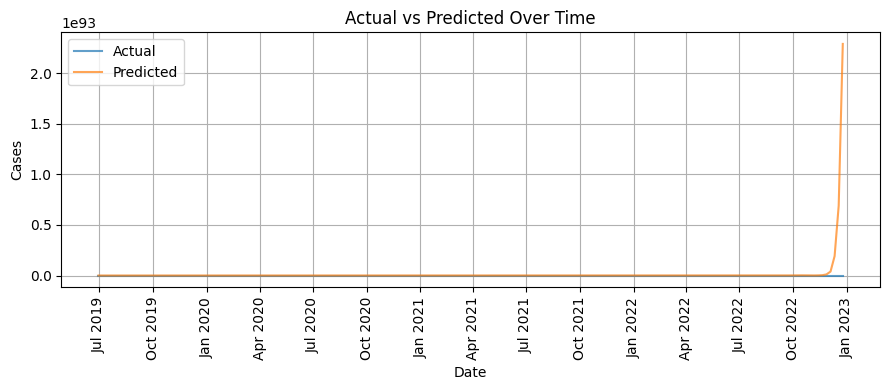


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-128-Huber
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
   📊 --- Model Evaluation ---
   RMSE: 23422390626237680.0000
   MAE: 4845009569400032.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


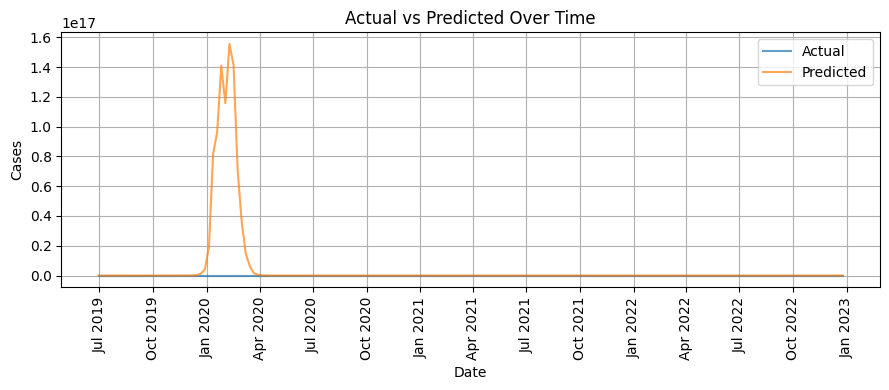


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=StackedLSTM-256-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step
   📊 --- Model Evaluation ---
   RMSE: inf
   MAE: 656019327457143764139074005640656062071353713652305499811399335429070510866552436429196909212048822736693414986252890996527234360045585427799620752827358944932713744462758594593320205622968320.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


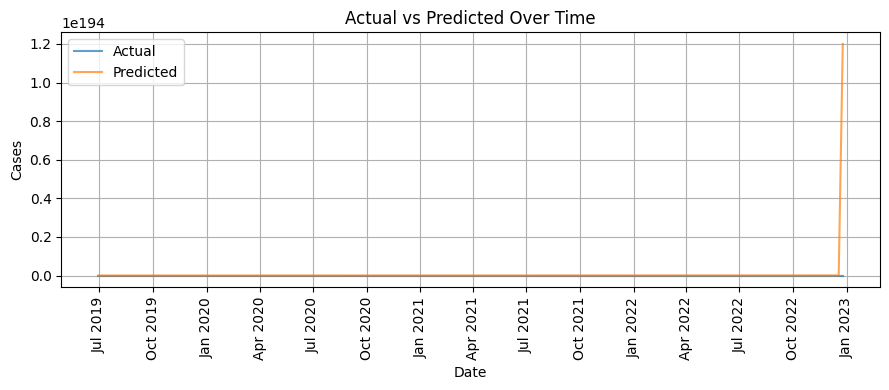


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=BiLSTM-128
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step

❌ Error usando los parametros: use_log=True, target=diff2, fechas=['2017-01-01', '2020-06-28', '2024-01-01'], modelo=BiLSTM-128
   -> Error: Input contains infinity or a value too large for dtype('float64').


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=EncDec-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.4853
   MAE: 0.0975
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


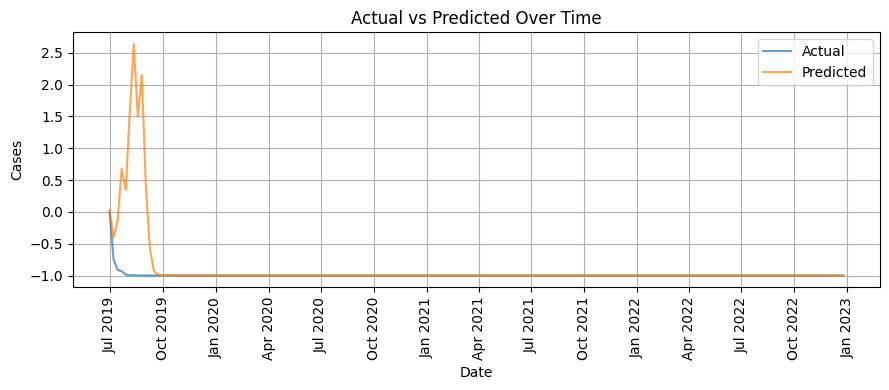


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=LSTM-200-DenseWide
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
   📊 --- Model Evaluation ---
   RMSE: 3.0329
   MAE: 0.7747
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


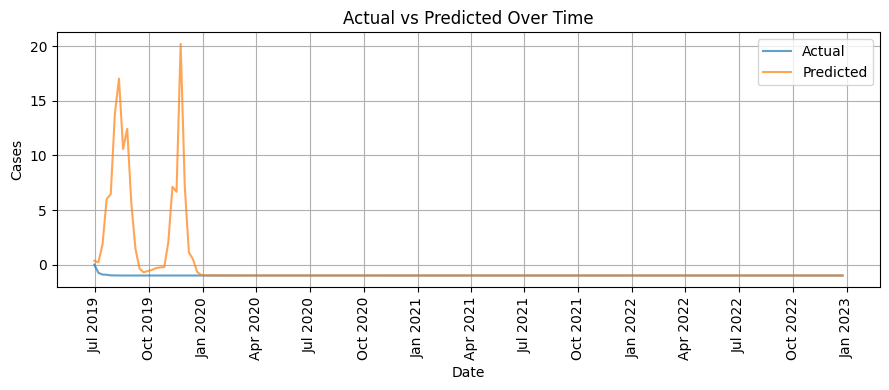


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2017-01-01', '2020-06-28', '2024-01-01'] | modelo=DeepStackedLSTM-256-128-64
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step

❌ Error usando los parametros: use_log=True, target=diff2, fechas=['2017-01-01', '2020-06-28', '2024-01-01'], modelo=DeepStackedLSTM-256-128-64
   -> Error: Input contains infinity or a value too large for dtype('float64').


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-128-Huber
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
   📊 --- Model Evaluation ---
   RMSE: 9472071409033870446034300096677476628242818658975024686964965643095578596557993243093614964907153200073630430337762569933029376.0000
   MAE: 1039824678222920176788760705083853929051367605775235029406192630960113706376016569766804743956737358450104532527230368297779200.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


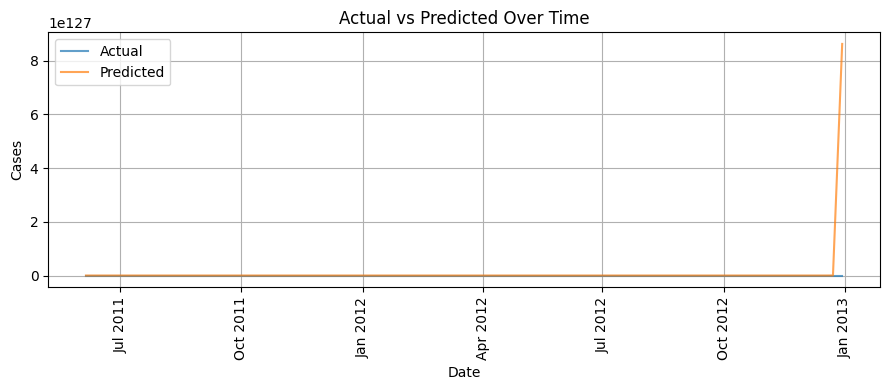


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=StackedLSTM-256-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
   📊 --- Model Evaluation ---
   RMSE: 195111447912957957103152269540230911068243421304461923178250240.0000
   MAE: 21518042944102301049040230697792791794690654966850267633418240.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


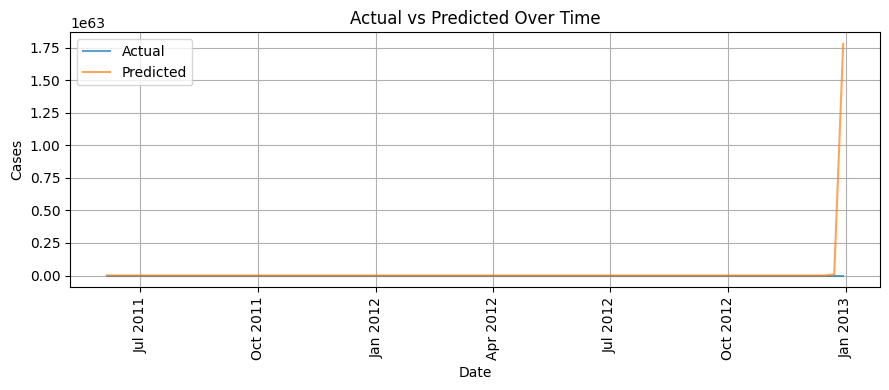


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=BiLSTM-128
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step
   📊 --- Model Evaluation ---
   RMSE: 17215710584056460339052544.0000
   MAE: 4442818223324068524851200.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


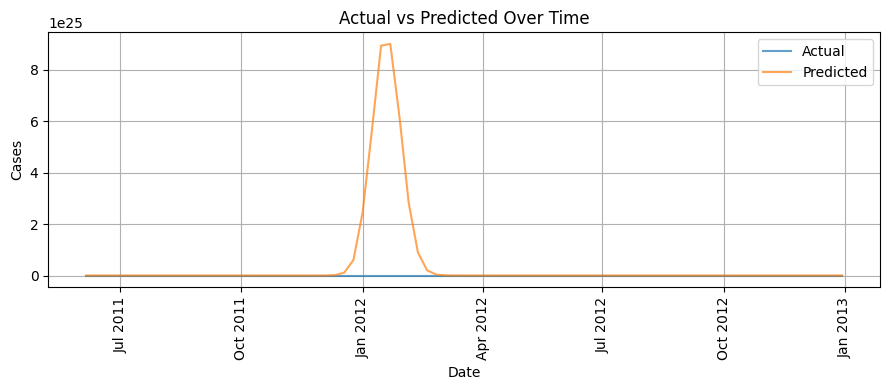


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=EncDec-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
   📊 --- Model Evaluation ---
   RMSE: 304807642230676096186612644017295003967257185769190004208857493839133708632059169655185197187758246854656.0000
   MAE: 33515071373145685267995718319741958629261871549615251504529789328028693481917934557797052373113828802560.0000
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


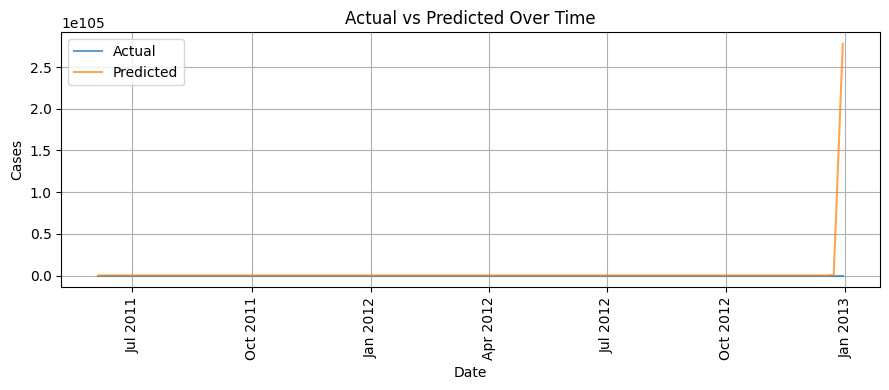


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=LSTM-200-DenseWide
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step

❌ Error usando los parametros: use_log=True, target=diff2, fechas=['2011-01-01', '2012-06-01', '2014-01-01'], modelo=LSTM-200-DenseWide
   -> Error: Input contains infinity or a value too large for dtype('float64').


🔹 Ejecutando: use_log=True | target=diff2 | fechas=['2011-01-01', '2012-06-01', '2014-01-01'] | modelo=DeepStackedLSTM-256-128-64
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step
   📊 --- Model Evaluation ---
   RMSE: 0.0271
   MAE: 0.0087
   ❌ Modelo NO candidato (no mejora lo esperado sobre naive)


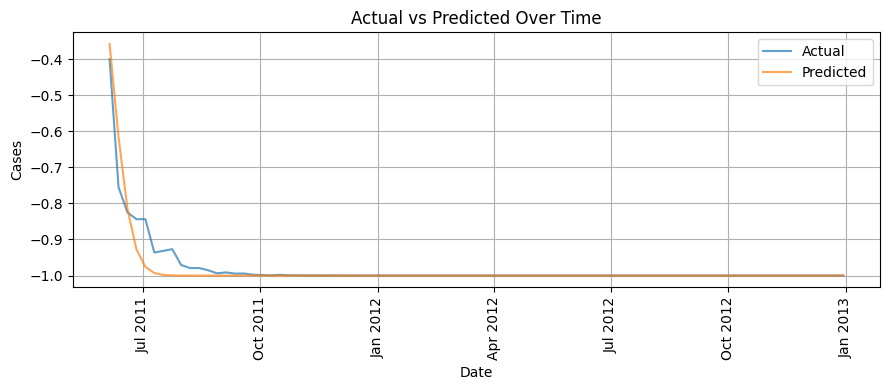

In [6]:
for use_log, target, dates, architecture in itertools.product(use_logs, targets, dates_tuples, architectures):
    try:
        params = {"exog": True, "add_outlier": True, "use_log": use_log, "target_mode": target}
        start_date, test_date, end_date = dates
        model = architecture["model"]
        loss = architecture["loss"]
        epochs = architecture["epochs"]
        batch_size= architecture["batch_size"]
        timesteps = architecture["timesteps"]

        print(f"\n🔹 Ejecutando: use_log={use_log} | target={target} | fechas={dates} | modelo={architecture['name']}")

        df = pd.read_pickle(f"{PROJECT_ROOT}/data/conformed/data.pkl")
        df = format_df(df, **params)
        # print(df.head())

        train_df, test_df = split_by_date(df, start_date, test_date, end_date)
        test_df = pd.concat([train_df.tail(timesteps), test_df], ignore_index=False)

        scaler_x = MinMaxScaler()
        X_train = scaler_x.fit_transform(train_df.drop(columns=["CASES"]))
        X_test  = scaler_x.transform(test_df.drop(columns=["CASES"]))
        scaler_y = MinMaxScaler()
        y_train = scaler_y.fit_transform(train_df[["CASES"]])
        y_test  = scaler_y.transform(test_df[["CASES"]])

        train_final_model(params, model, X_train, y_train, X_test, y_test, train_df, test_df, scaler_y, timesteps, epochs, batch_size, loss)
    except Exception as e:
        print(f"\n❌ Error usando los parametros: use_log={use_log}, target={target}, fechas={dates}, modelo={architecture['name']}")
        print(f"   -> Error: {e}\n")
